In [1]:
from scipy import io
import GPy
import numpy as np
import matplotlib.pyplot as plt
import pylab as pb

In [2]:
def build_XY(input_list,output_list=None):
    num_outputs = len(input_list)
    Y = np.vstack(output_list)
    I = np.hstack( [np.repeat(j,_x.shape[0]) for _x,j in zip(input_list,range(num_outputs))] )
    X = np.vstack(input_list)
    X = np.hstack([X,I[:,None]])
    I = {'output_index':I[:,None]}
    return X,Y,I

In [3]:
def plot_2outputs(m,xlim,x_1,x_2):
    fig = pb.figure(figsize=(12,8))
    #Output 1
    ax1 = fig.add_subplot(211)
    ax1.set_xlim(xlim)
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1,legend=False)

    #Output 2
    ax2 = fig.add_subplot(212)
    ax2.set_xlim(xlim)
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2,legend=False)

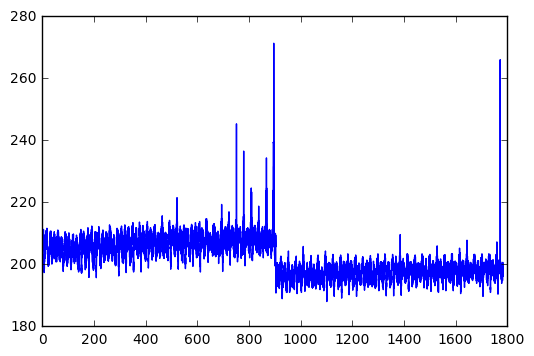

In [4]:
mat_file1 = io.loadmat('2014_Dataset3.mat')
t = mat_file1['t']
p1 = mat_file1['p1']
p2 = mat_file1['p2']
x = np.arange(0,len(p2)/10,0.1)[:,None]
plt.plot(x,p2)
plt.show()

In [5]:
import pickle
f = open('d:/hyperparameter3','rb')
gp = pickle.load(f)
f.close()

In [12]:
def B(model):
    w0 = model.sum.ICM0.B.W[0][0]
    w1 = model.sum.ICM0.B.W[1][0]
    w = np.array([[w0,w1]])
    B_gp = np.transpose(w)*w + np.diag([model.sum.ICM0.B.kappa[0],model.sum.ICM0.B.kappa[1]])

    w2 = model.sum.ICM1.B.W[0][0]
    w3 = model.sum.ICM1.B.W[1][0]
    w4 = np.array([[w0,w1]])
    B2_gp = np.transpose(w4)*w4 + np.diag([model.sum.ICM1.B.kappa[0],model.sum.ICM1.B.kappa[1]])
    
    return B_gp, B2_gp

K1 = GPy.kern.RBF(1)
K2 = GPy.kern.PeriodicMatern52(1)
a,b = B(gp)
a


array([[  1.32536952e-01,   9.31653612e+00],
       [  9.31653612e+00,   6.59217226e+02]])

In [16]:
np.linalg.norm(a-e)

10.302466492649621

In [17]:
np.linalg.norm(a-c)

123.22892424585514

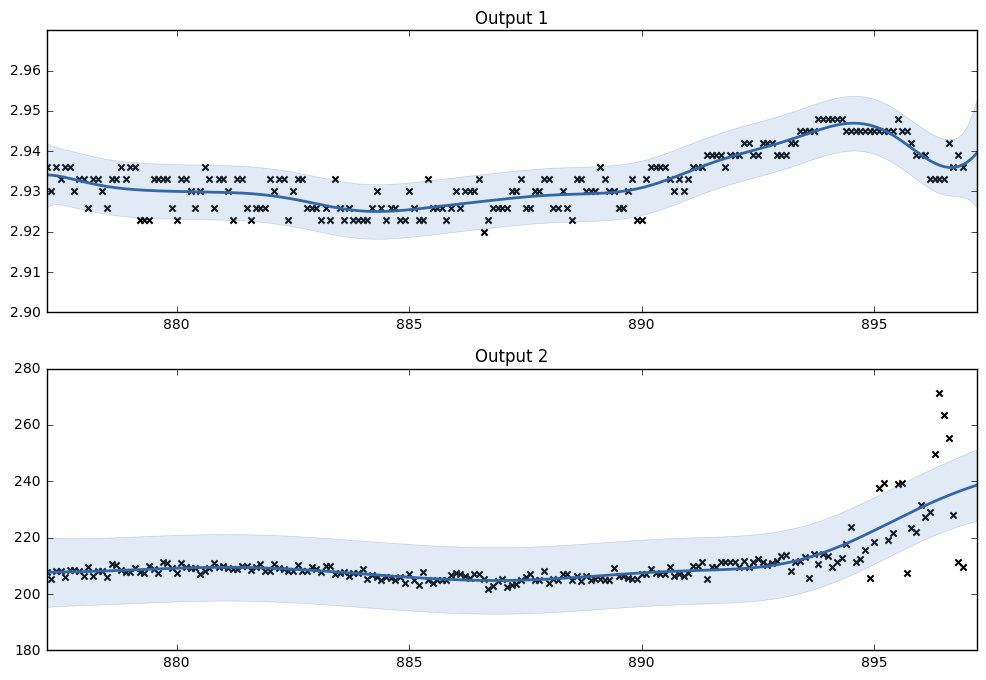

In [15]:
lcm = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2])
mul = GPy.models.GPCoregionalizedRegression([x[8772:8970],x[8772:8970]],[p1[8772:8970],p2[8772:8970]],kernel = lcm)

mul['.*rbf.variance'].constrain_fixed(gp.sum.ICM0.rbf.variance)
mul['.*rbf.lengthscale'].constrain_fixed(gp.sum.ICM0.rbf.lengthscale)
mul['.*periodic_Matern52.variance'].constrain_fixed(gp.sum.ICM1.periodic_Matern52.variance)
mul['.*periodic_Matern52.lengthscale'].constrain_fixed(gp.sum.ICM1.periodic_Matern52.lengthscale)
mul['.*periodic_Matern52.period'].constrain_fixed(gp.sum.ICM1.periodic_Matern52.period)

mul.optimize()
plot_2outputs(mul, xlim=(x[8772],x[8972]),x_1=x[8772:8970],x_2=x[8772:8970])
plt.show()

c,d = B(mul)

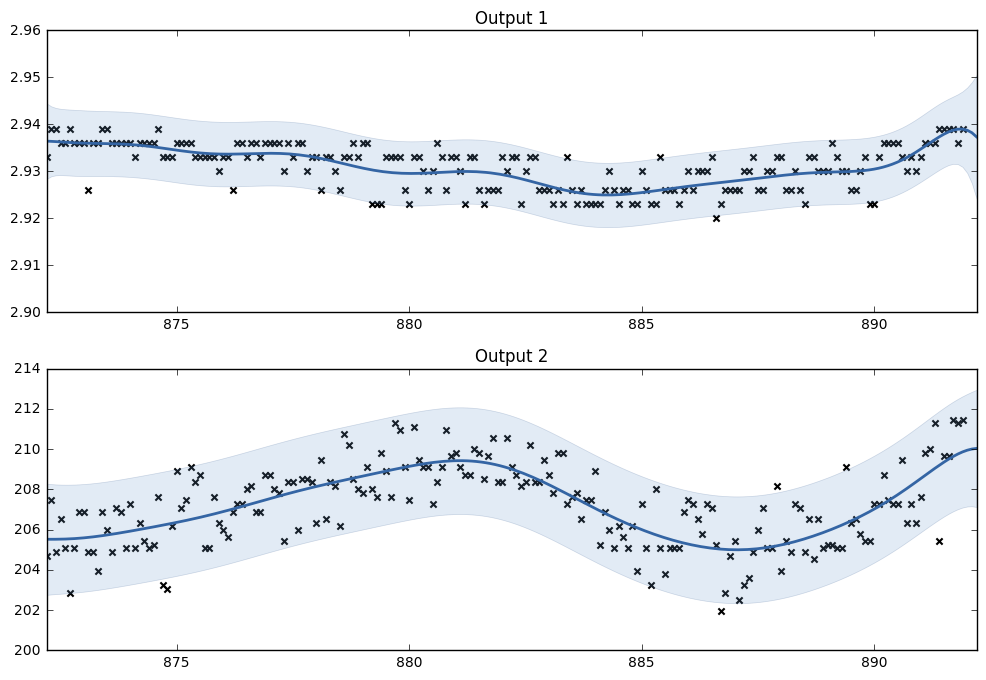

In [13]:
lcm2 = GPy.util.multioutput.LCM(input_dim=1,num_outputs=2,kernels_list=[K1,K2])
mul2 = GPy.models.GPCoregionalizedRegression([x[8722:8920],x[8722:8920]],[p1[8722:8920],p2[8722:8920]],kernel = lcm2)

mul2['.*rbf.variance'].constrain_fixed(gp.sum.ICM0.rbf.variance)
mul2['.*rbf.lengthscale'].constrain_fixed(gp.sum.ICM0.rbf.lengthscale)
mul2['.*periodic_Matern52.variance'].constrain_fixed(gp.sum.ICM1.periodic_Matern52.variance)
mul2['.*periodic_Matern52.lengthscale'].constrain_fixed(gp.sum.ICM1.periodic_Matern52.lengthscale)
mul2['.*periodic_Matern52.period'].constrain_fixed(gp.sum.ICM1.periodic_Matern52.period)

mul2.optimize()
plot_2outputs(mul2, xlim=(x[8722],x[8922]),x_1=x[8722:8920],x_2=x[8722:8920])
plt.show()

e,f = B(mul2)

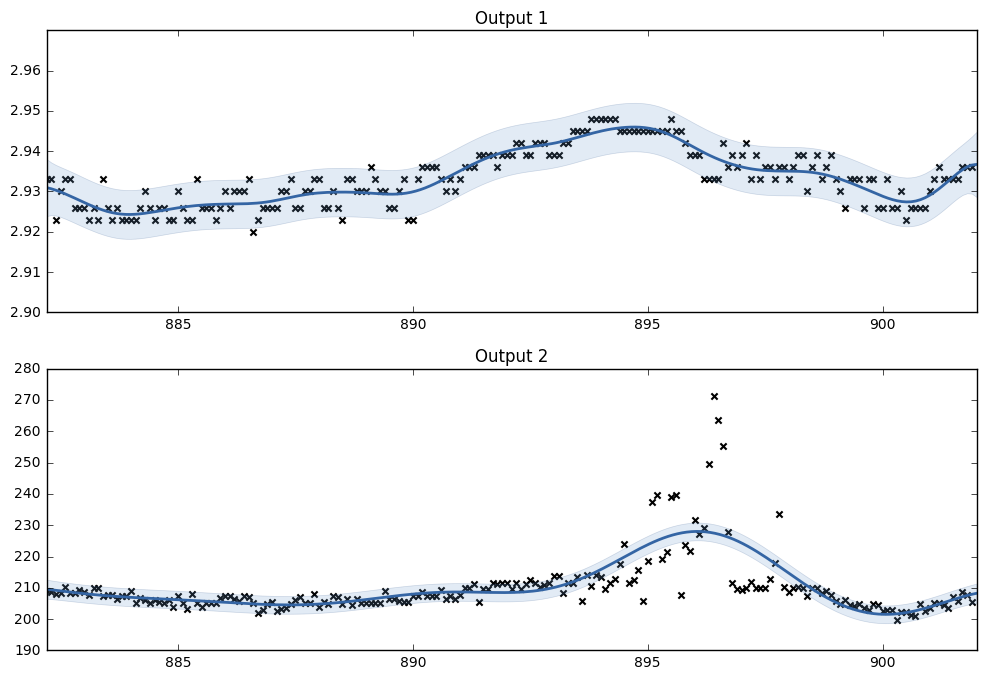

In [92]:
mul3 = GPy.models.GPCoregionalizedRegression([x[8822:9020],x[8822:9020]],[p1[8822:9020],p2[8822:9020]],kernel = kern)
mul3['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
mul3['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
plot_2outputs(mul3, xlim=(x[8822],x[9020]),x_1=x[8822:9020],x_2=x[8822:9020])
plt.show()

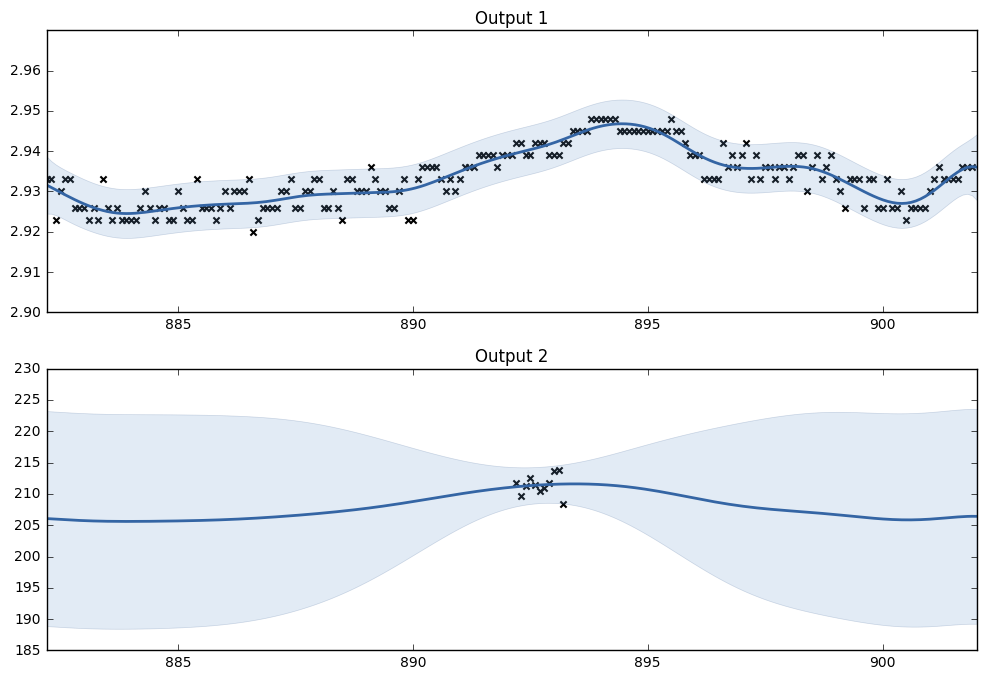

In [97]:
mul4 = GPy.models.GPCoregionalizedRegression([x[8822:9020],x[8922:8933]],[p1[8822:9020],p2[8922:8933]],kernel = kern)
mul4['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
mul4['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
plot_2outputs(mul4, xlim=(x[8822],x[9020]),x_1=x[8822:9020],x_2=x[8922:8933])
plt.show()

In [93]:
mul3.kern

# EVT-GP, anomaly score


In [6]:
def rbf(X,xt,m):
    Xt = xt*np.ones(len(X))[:,None]
    k = ((X-Xt)**2)/(2*(2*m.kern.ICM0.rbf.lengthscale[0])**2)
    ke = np.exp(-k)
    n = np.sum(ke)
    return n

def z_score(n):
    alpha = 2*np.log(n)**(-0.5)
    beta = (2*np.log(n))**(0.5) - (np.log(np.log(n))+np.log(2*np.pi))/(2*(2*np.log(n))**0.5)
    zp = beta-alpha*np.log(-np.log(0.95))
    return zp

In [7]:
def plot_3outputs(m,xlim,x_1,x_2,con_ue,con_le,n):
    fig = pb.figure(figsize=(12,12))
    #Output 1
    ax1 = fig.add_subplot(311)
    ax1.set_xlim(xlim)
    ax1.set_ylim([2.9,3.0])
    ax1.set_title('Output 1')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,0)],which_data_rows=slice(0,len(x_1)),ax=ax1,legend=False)

    #Output 2
    ax2 = fig.add_subplot(312)
    ax2.set_xlim(xlim)
    ax2.set_ylim([180,280])
    ax2.set_title('Output 2')
    m.plot(plot_limits=xlim,fixed_inputs=[(1,1)],which_data_rows=slice(len(x_1),len(x_1)+len(x_2)),ax=ax2,legend=False)
    ax2.plot(x[jt],con_ue,'red')
    ax2.plot(x[jt],con_le,'red')
    
    ax3 = fig.add_subplot(313)
    ax3.set_xlim([892,900])
    ax3.set_ylim([180,280])
    ax3.plot(x[test_points],p2[test_points],'kx')
    ax3.plot(x[anomal_points],p2[anomal_points],'kx',color='orange')
    ax3.plot(x[jt],con_ue,'red')
    ax3.plot(x[jt],con_le,'red')
    
    s = 'fig {}.png'.format(n)
#     fig.savefig(s)

In [8]:
def hyper_fix_score(kernel,kt,it,t,new):
    l = len(it)
    iit = it[0:len(it)-t]
    mul2 = GPy.models.GPCoregionalizedRegression([x[kt],x[iit]],[p1[kt],p2[iit]],kernel = kernel)
    mul2['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
    mul2['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
    
#     plot_2outputs(mul2, xlim=(x[kt[0]],x[kt[len(kt)-1]+1]),x_1=x[kt],x_2=x[iit])
#     tt = it[len(it)-t:len(it)]
#     plt.plot(x[new],p2[new],'kx',color='red')
#     plt.show()
    
    X,Y,I = build_XY([x[new],x[new]],[p1[new],p2[new]])
    mu,var = mul2.predict(X,Y_metadata=I,kern=mul2.kern,likelihood=mul2.likelihood)
    mu2 = mu[1]
    var2 = var[1]
    score = 0.5*np.log(var2*np.pi*2) + (p2[new]-mu2)**2/(2*var2)
    b = new
    return score,b

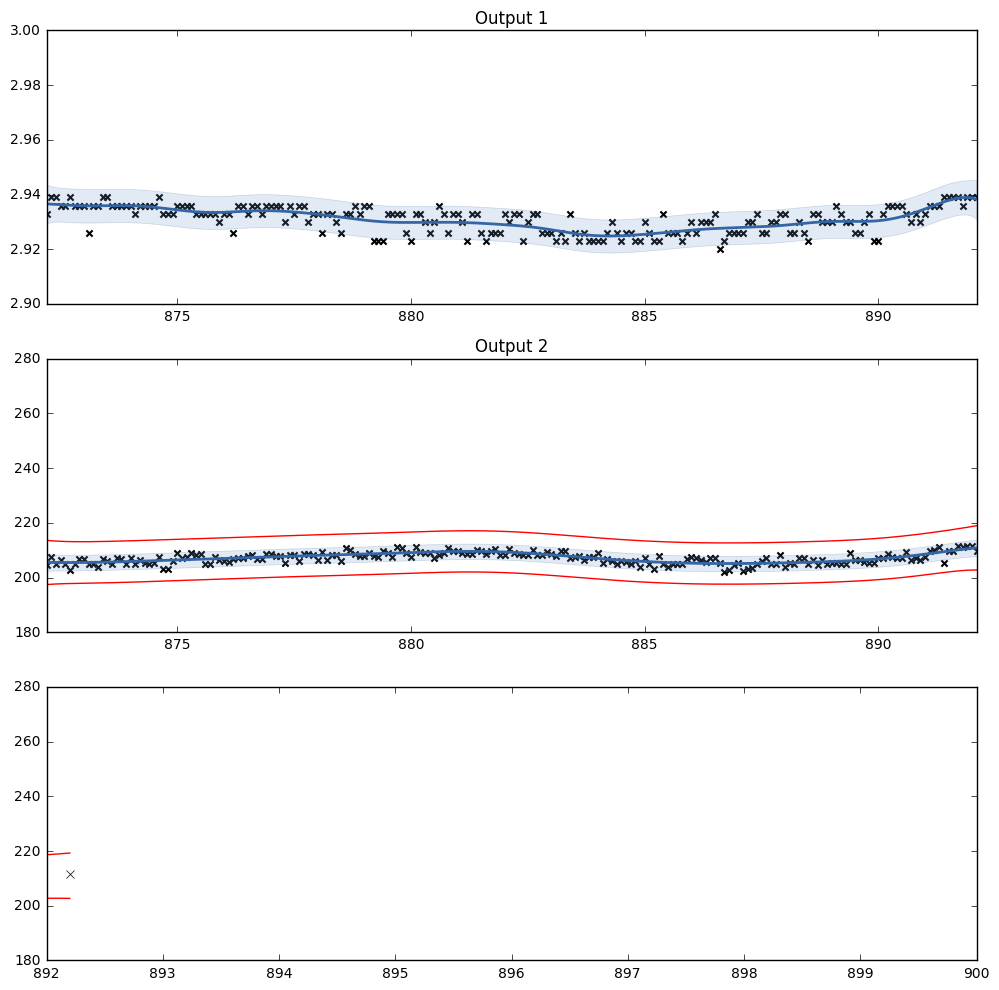

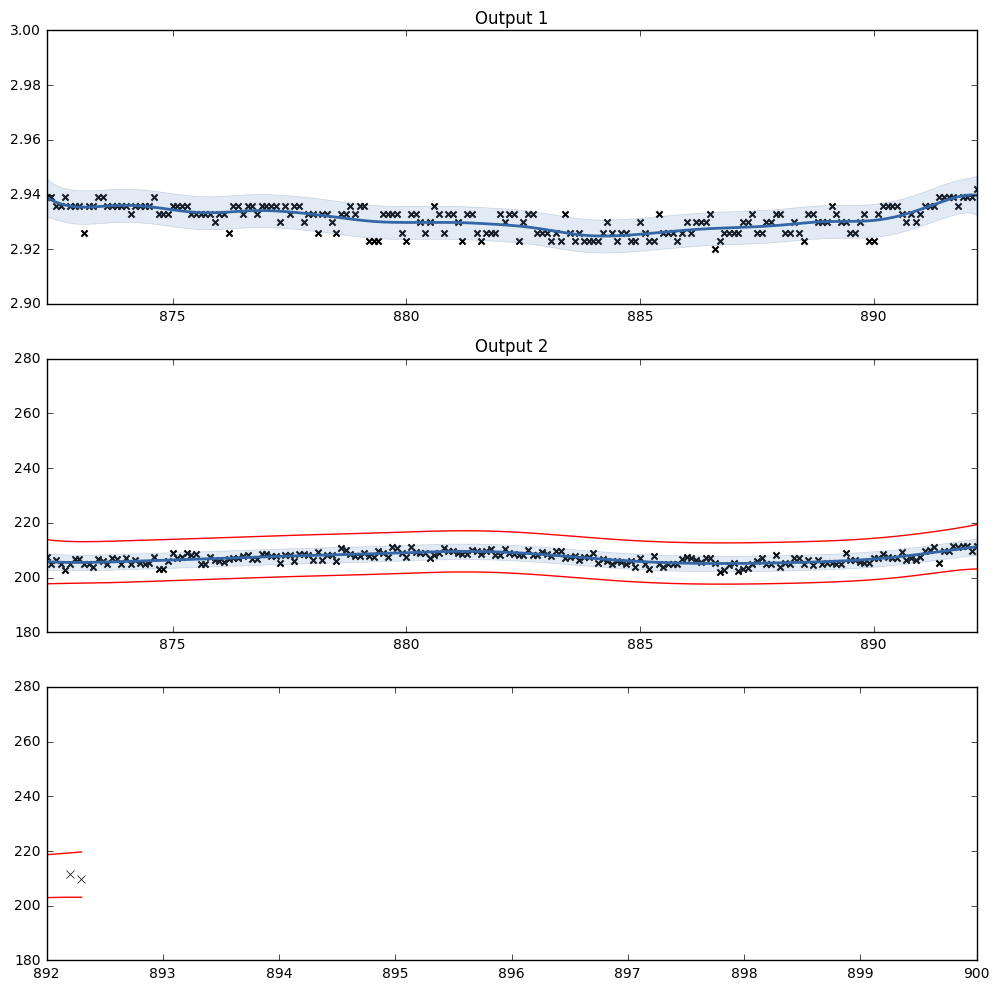

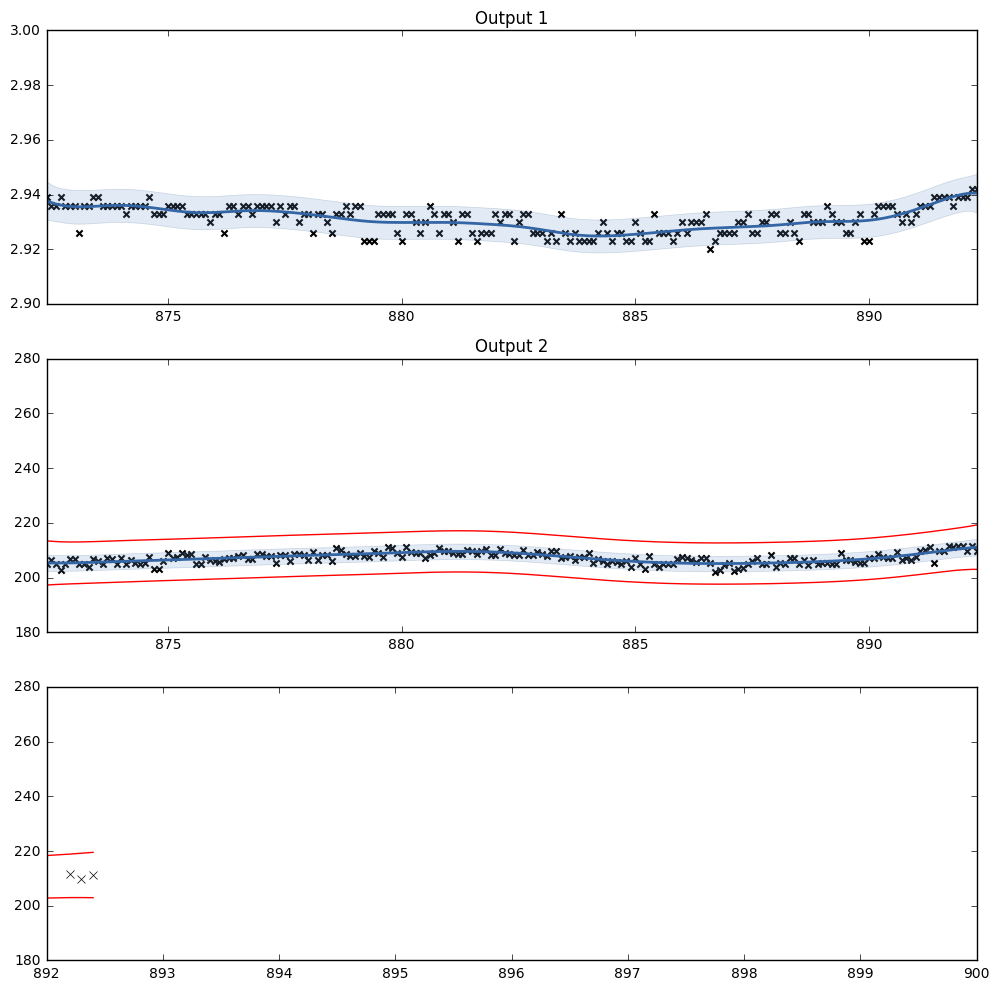

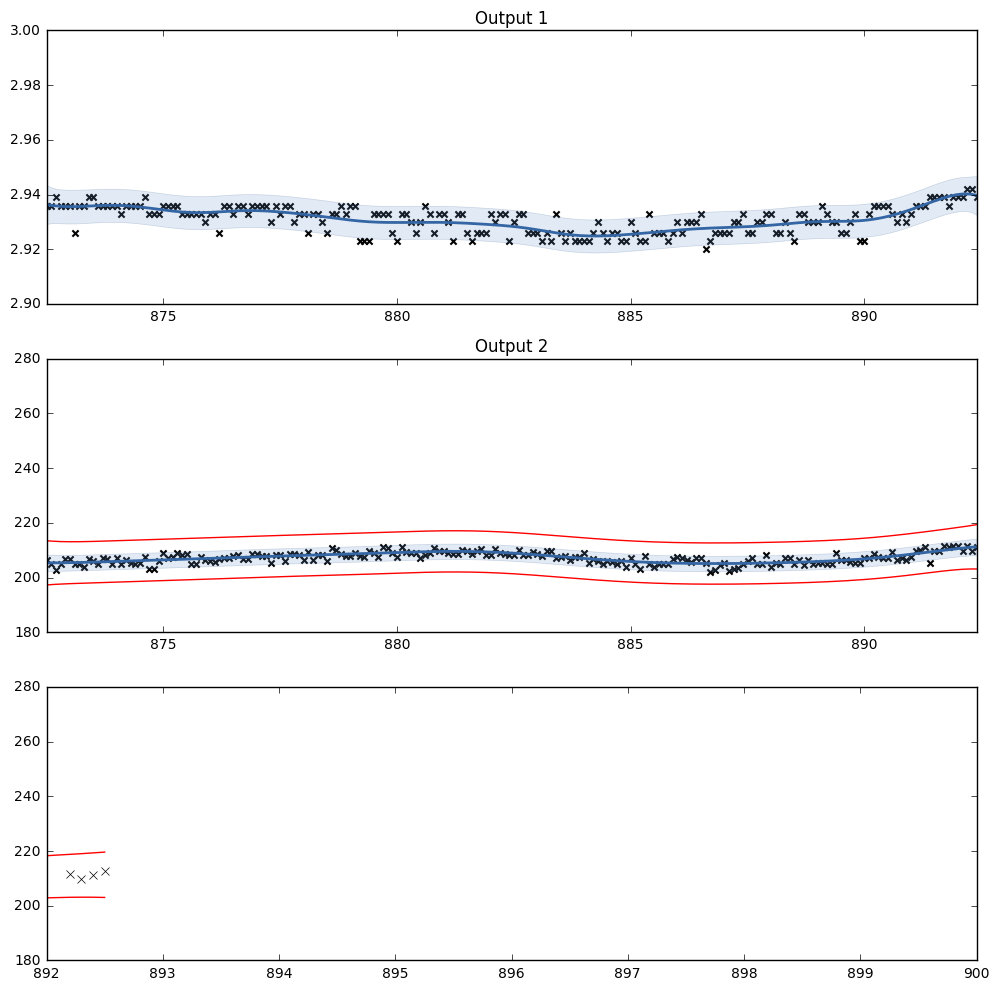

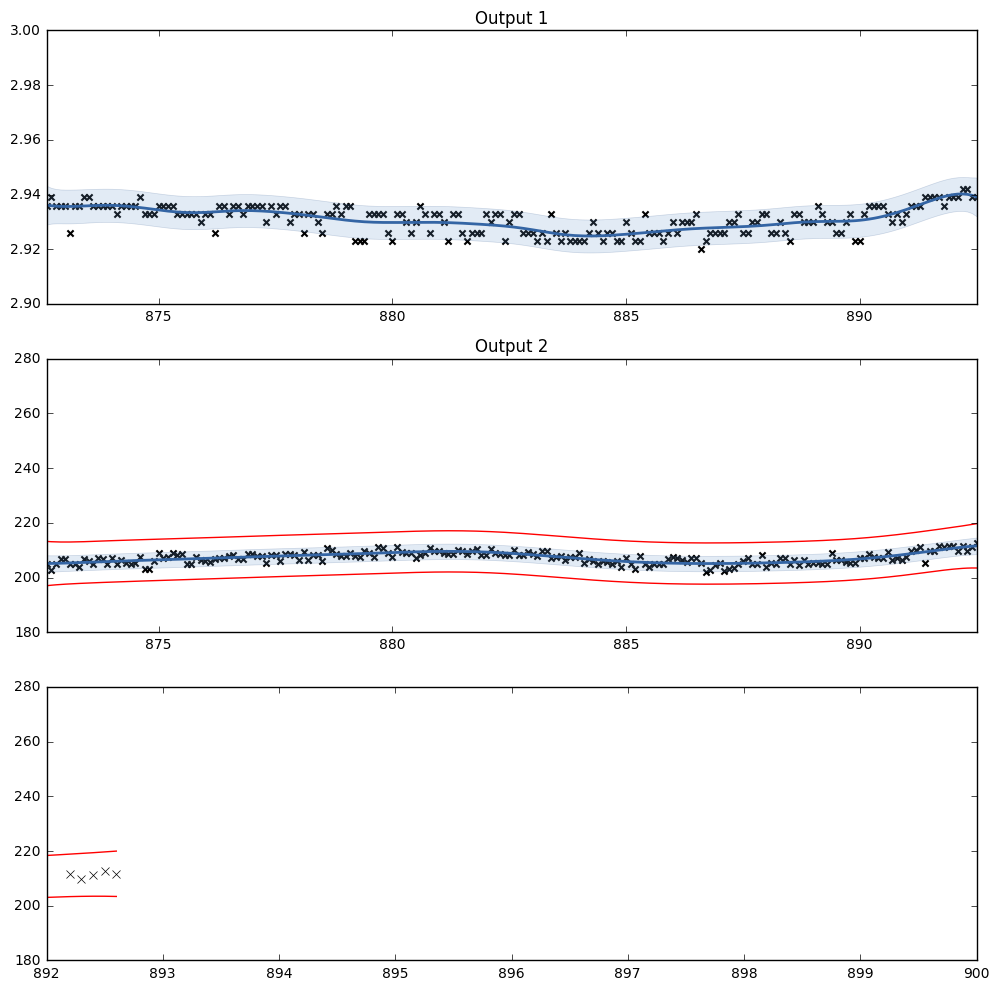

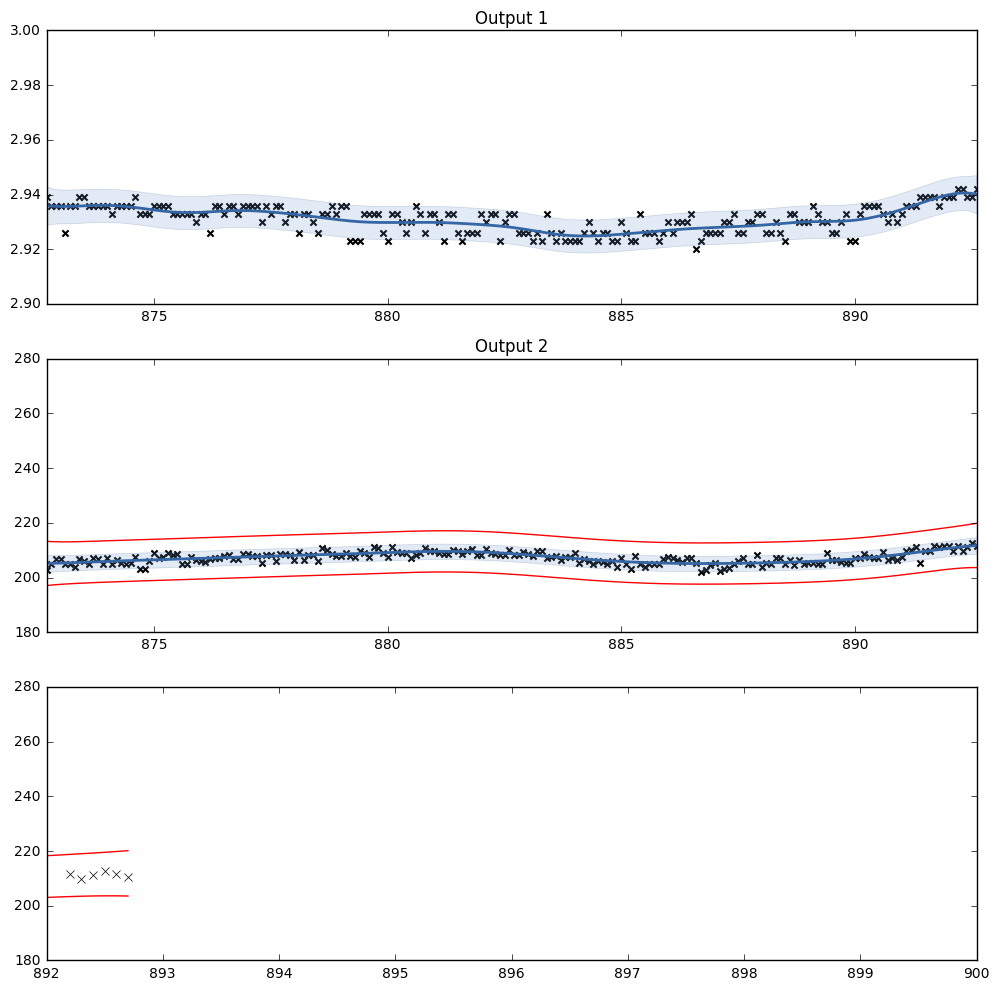

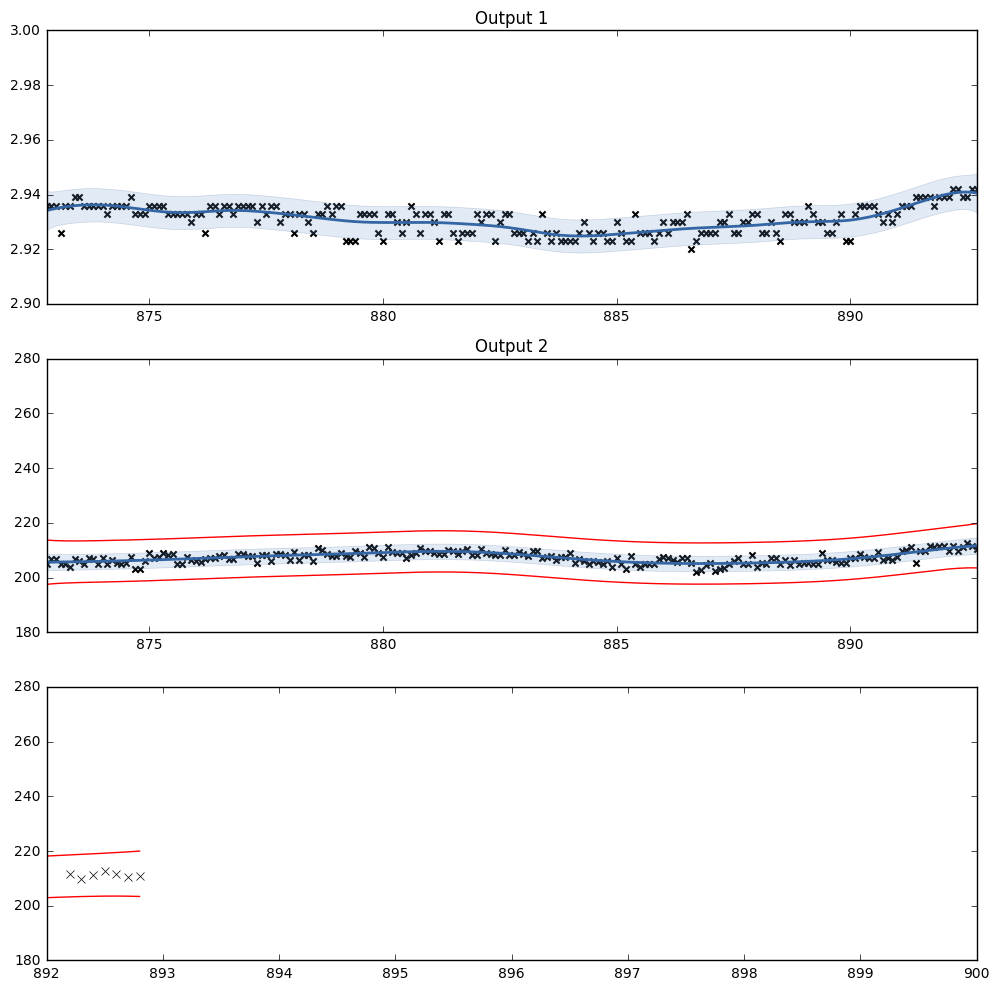

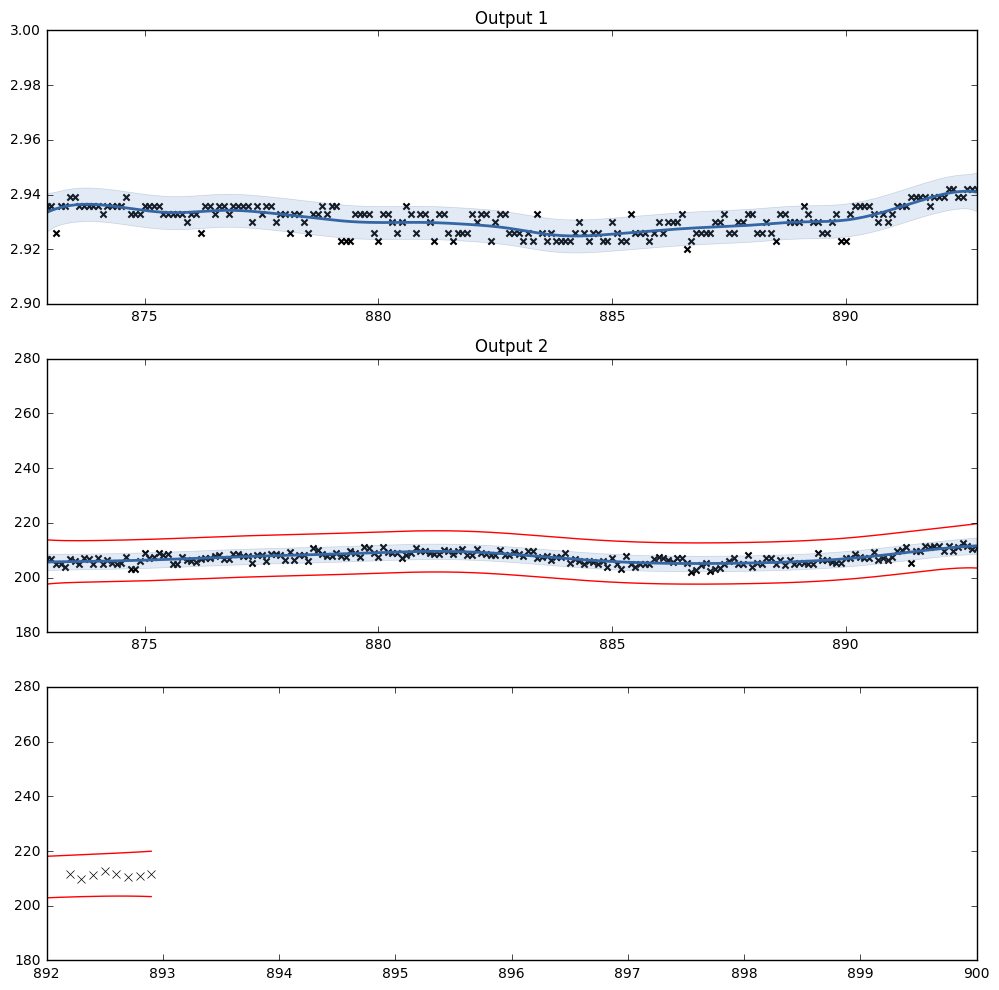

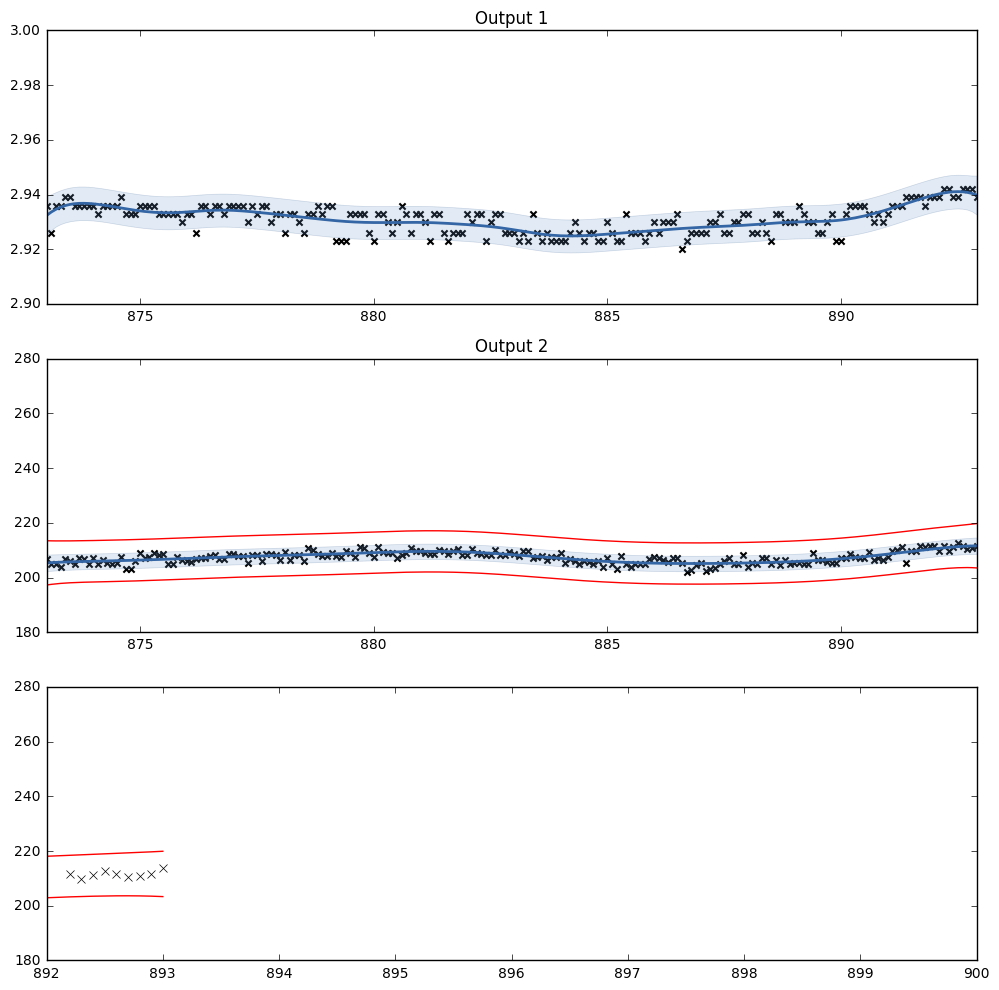

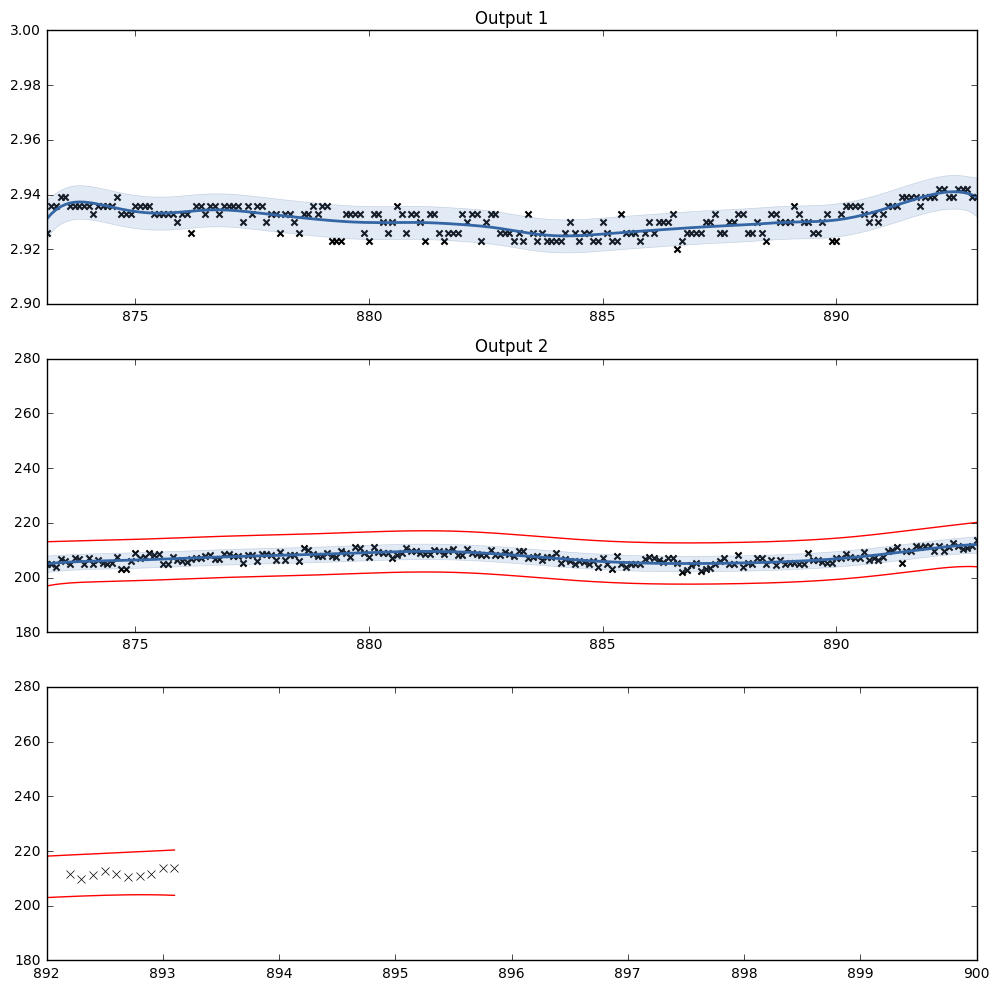

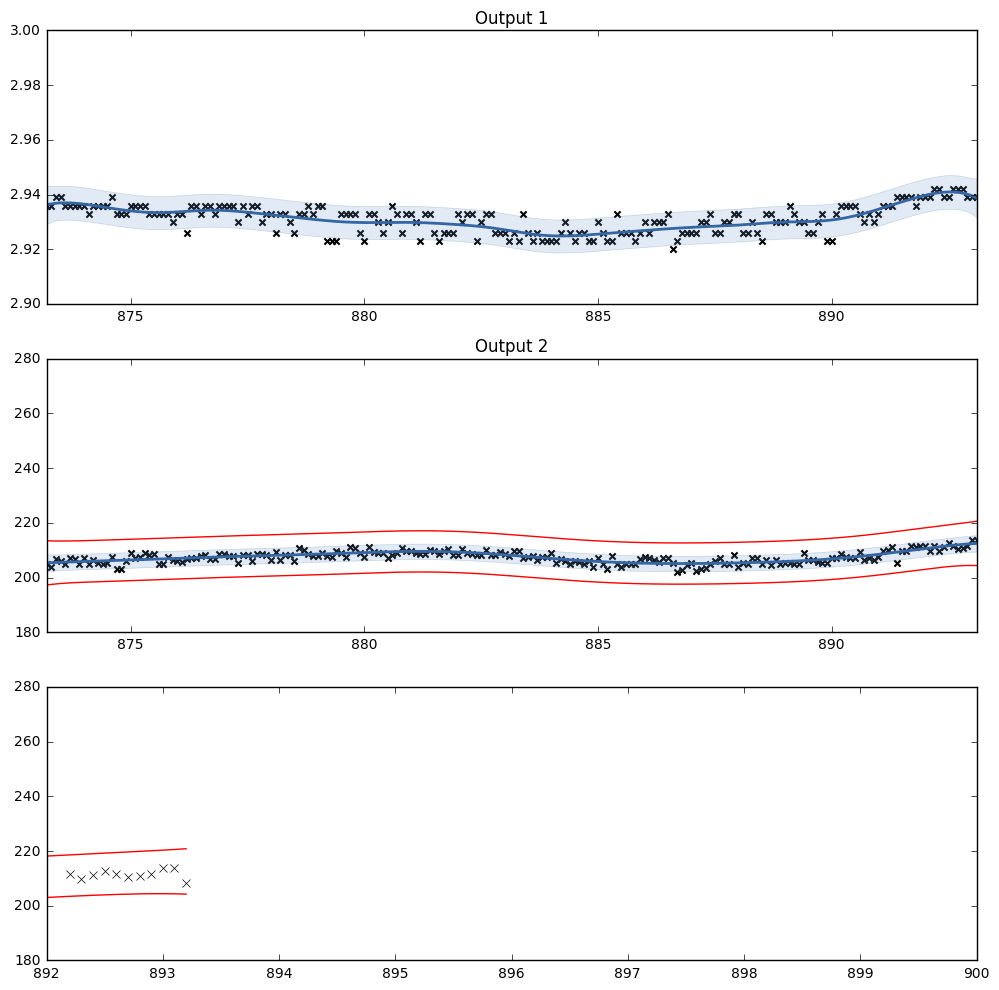

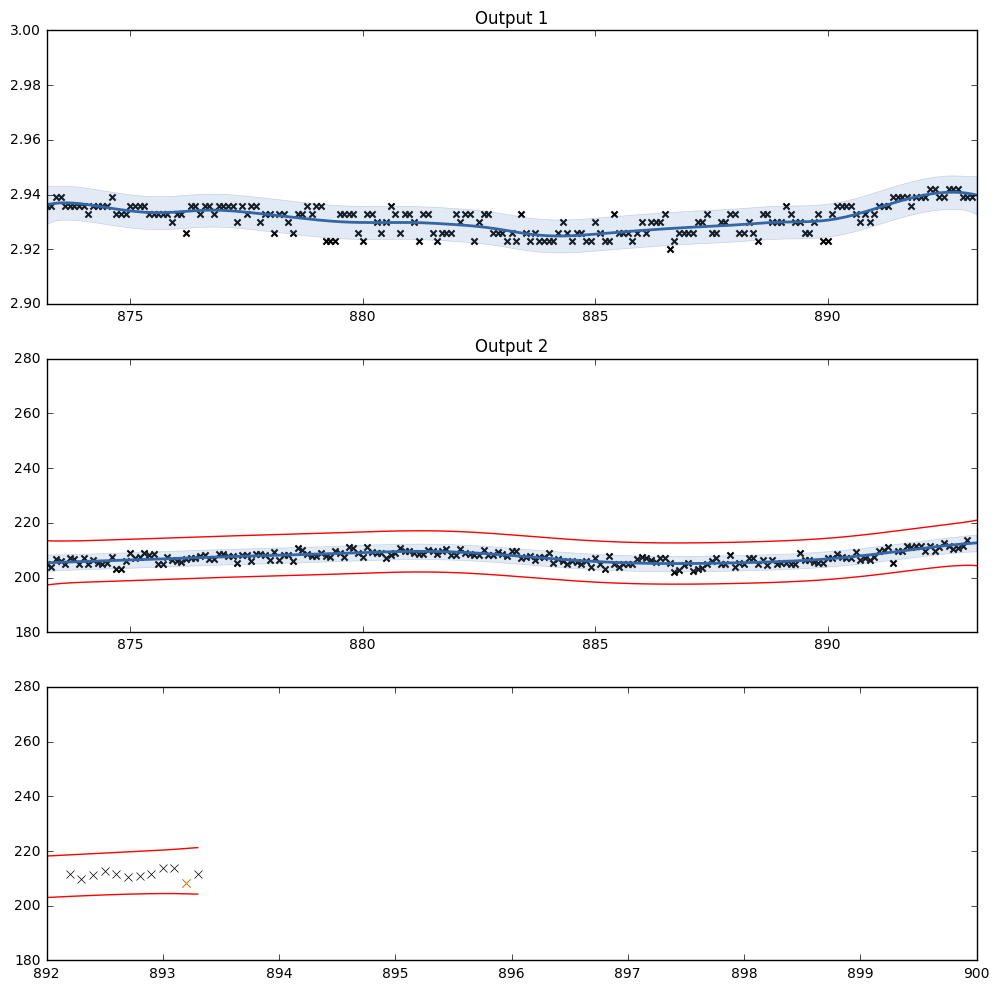

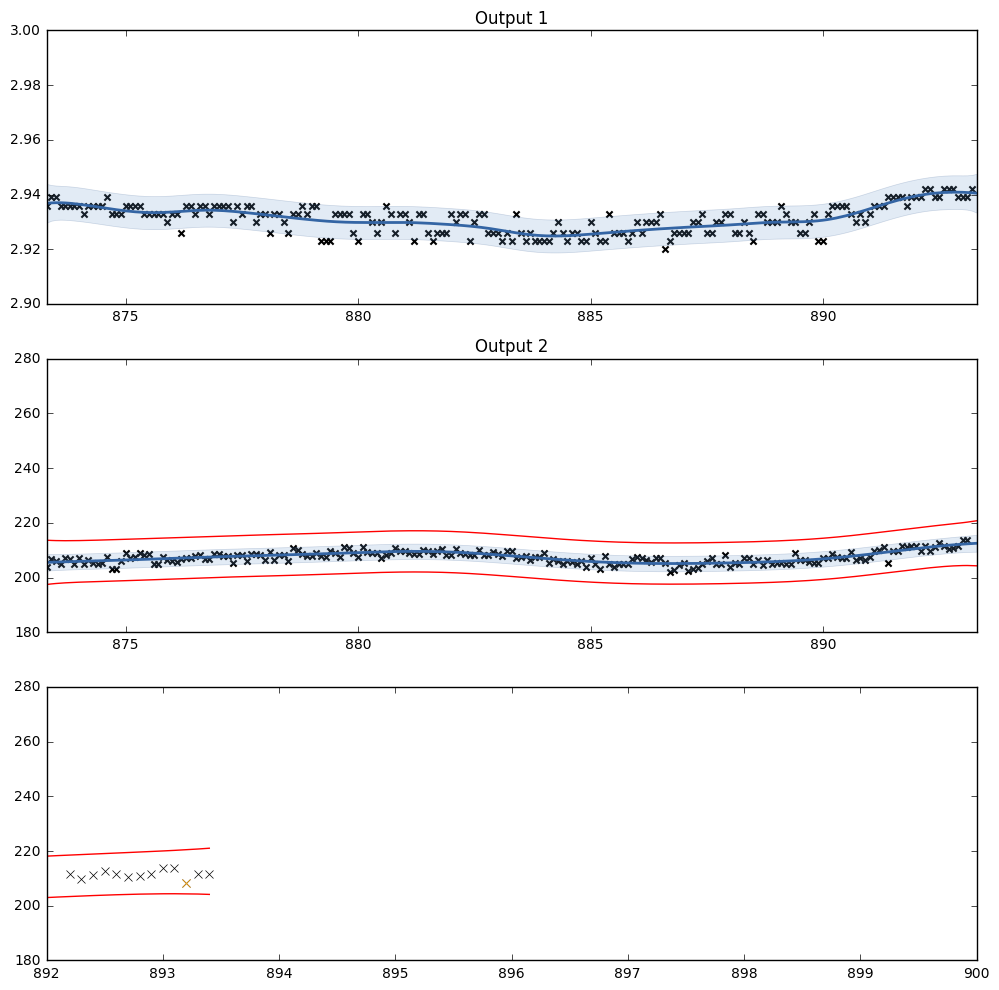

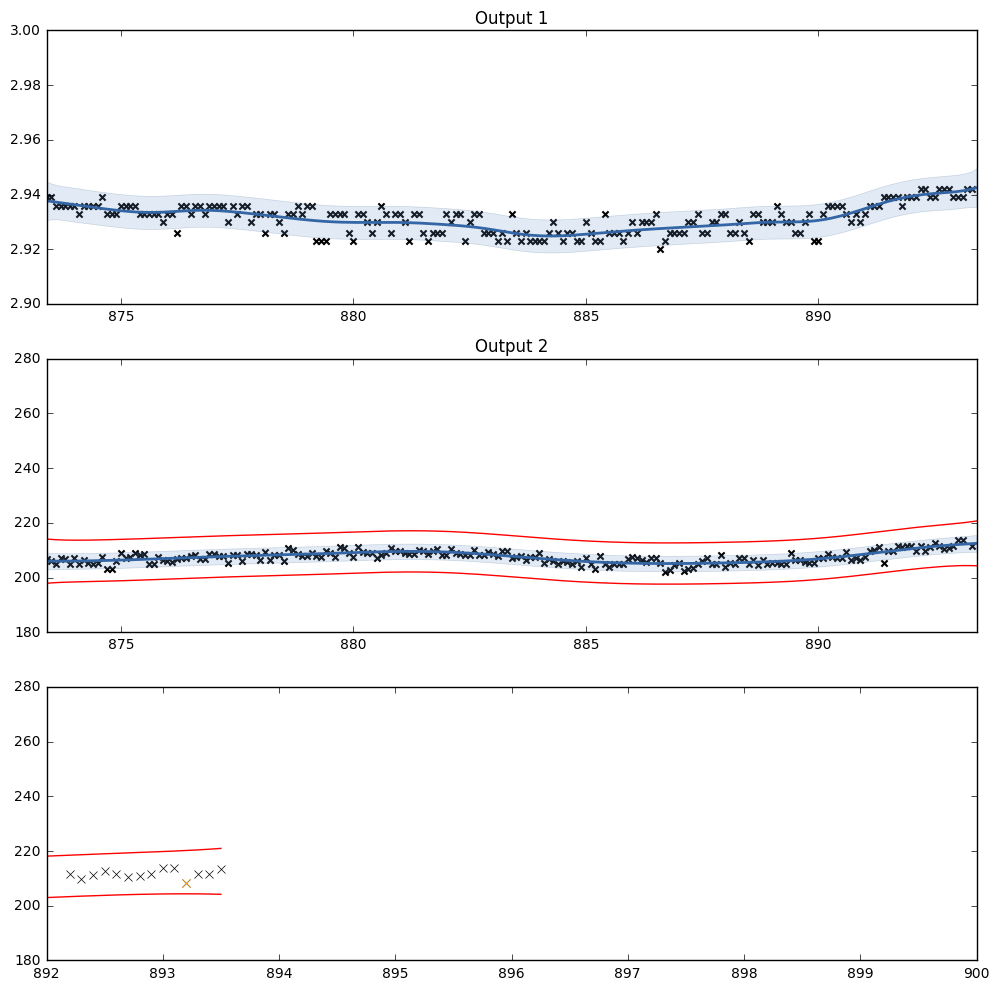

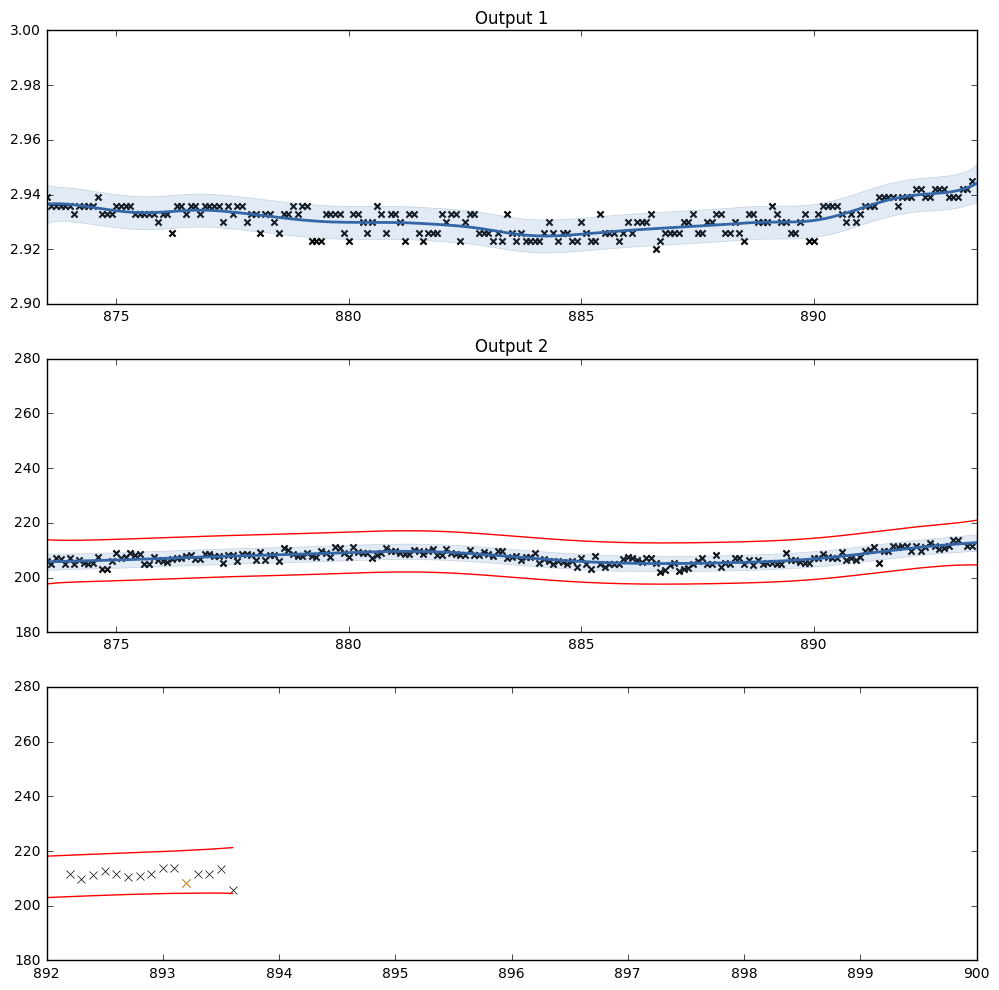

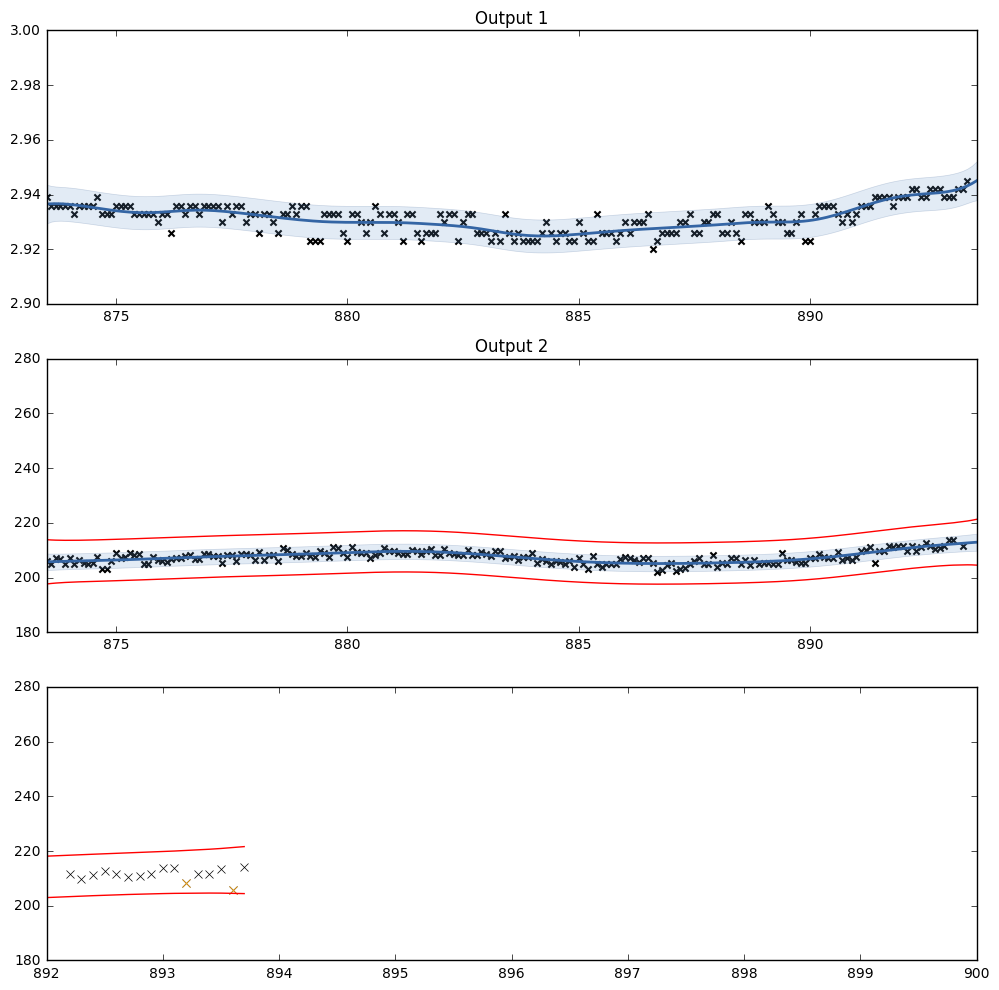

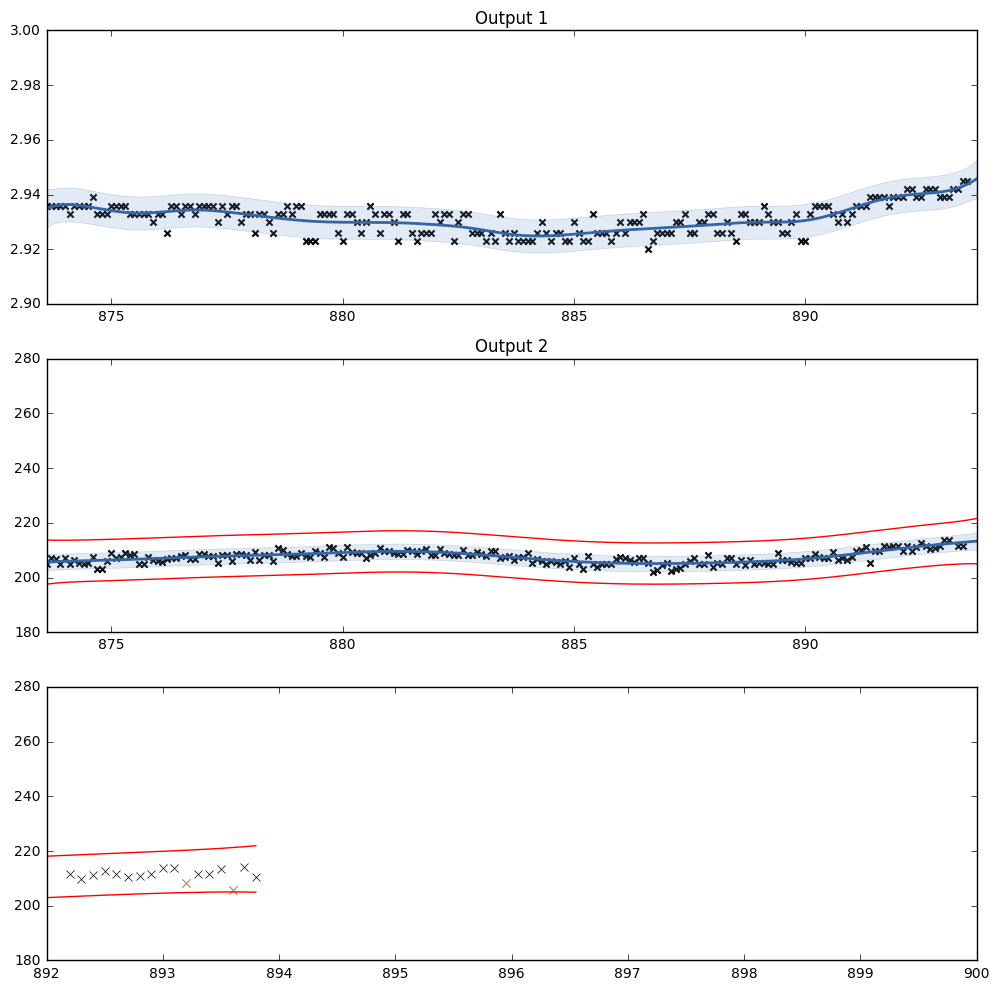

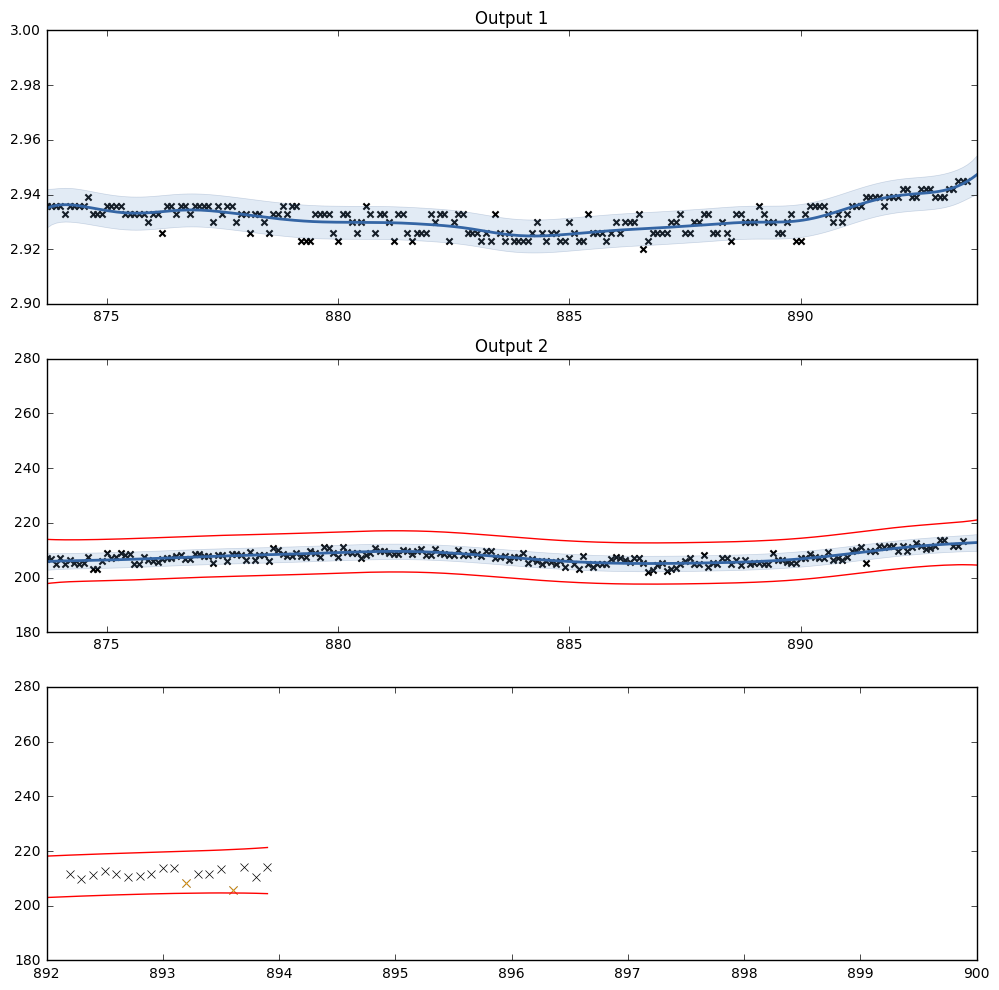

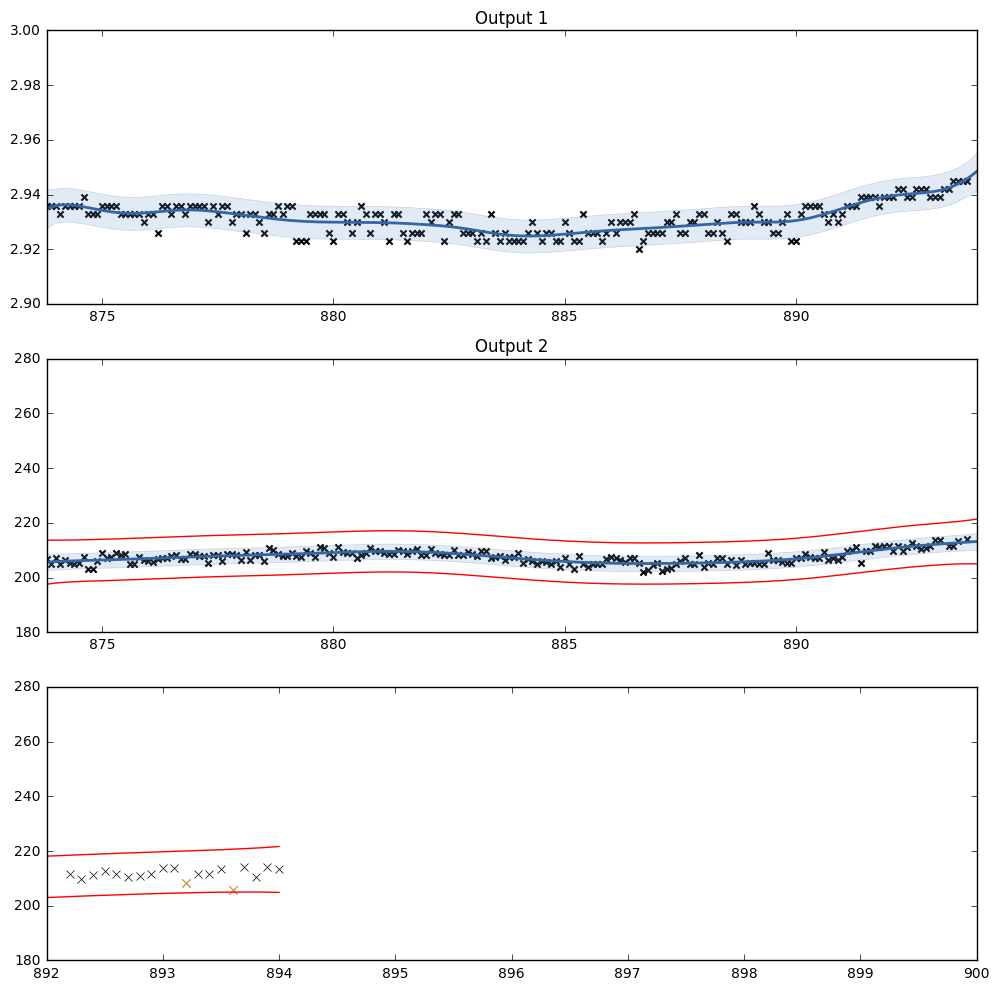

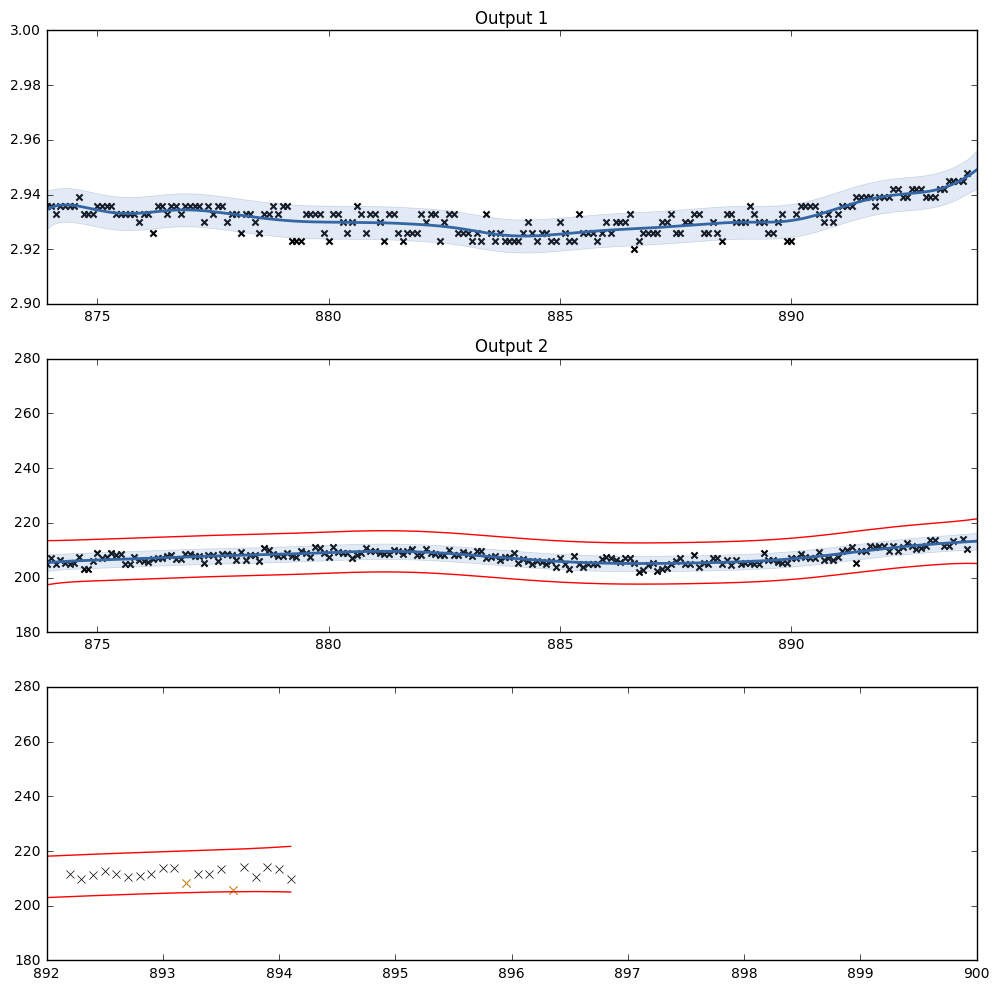

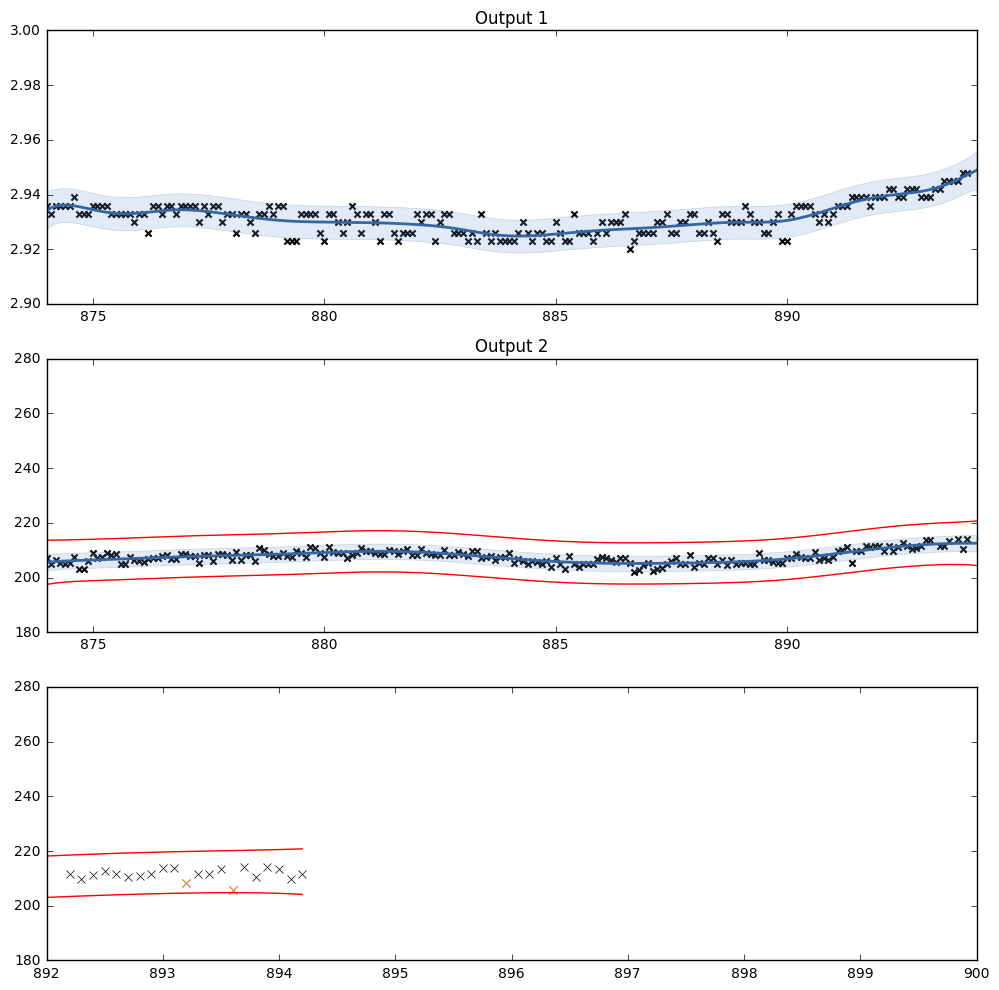

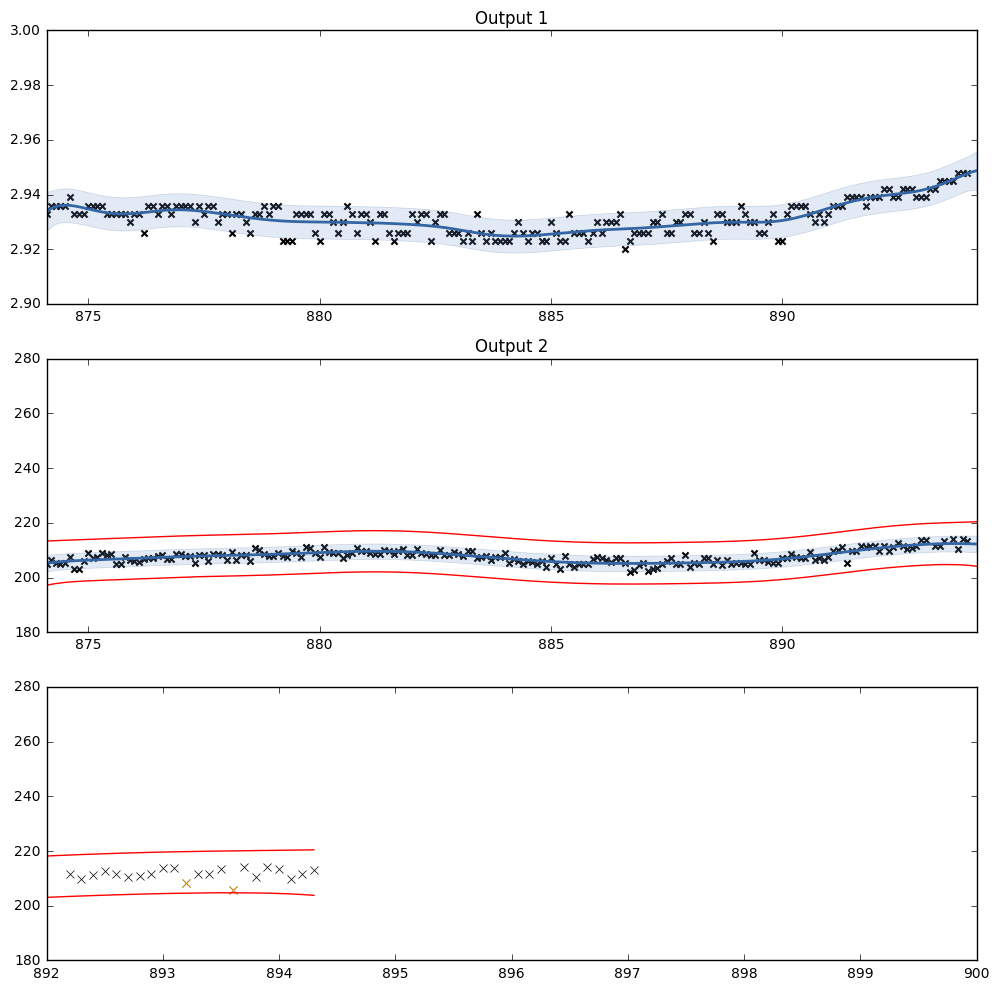

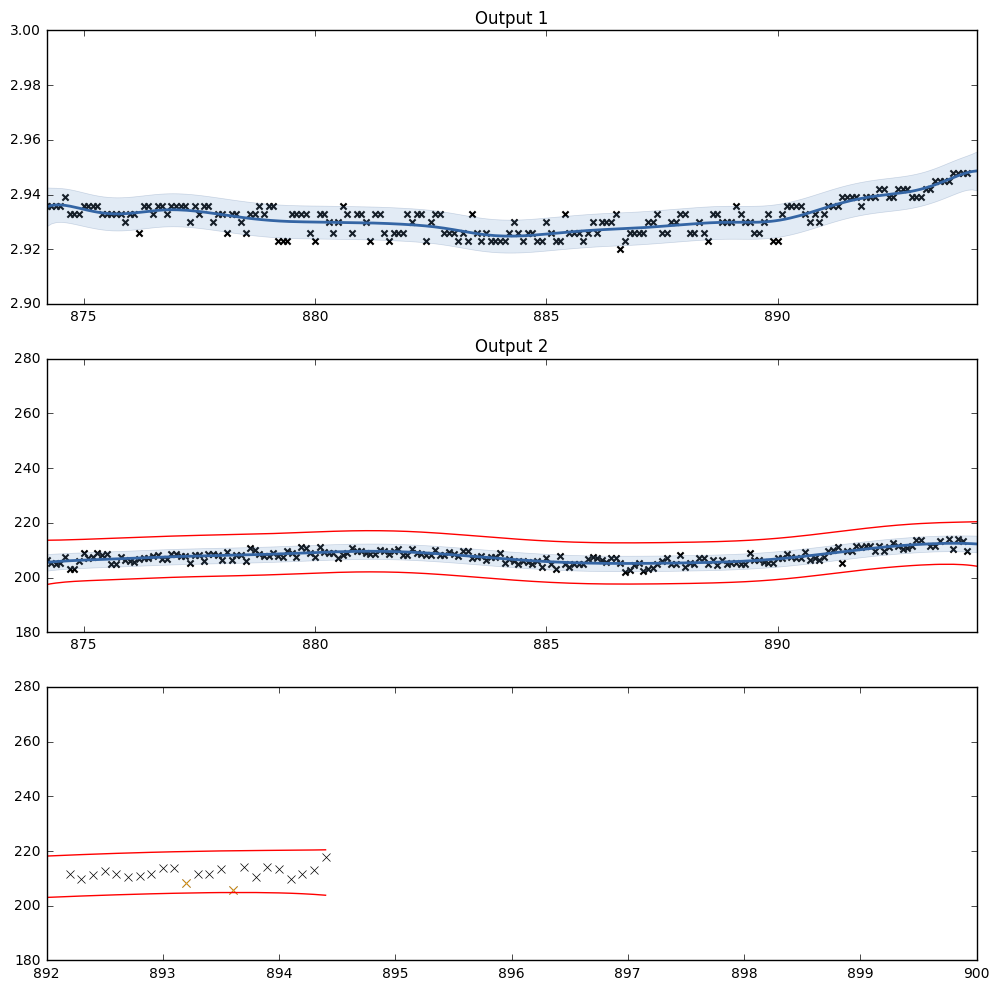

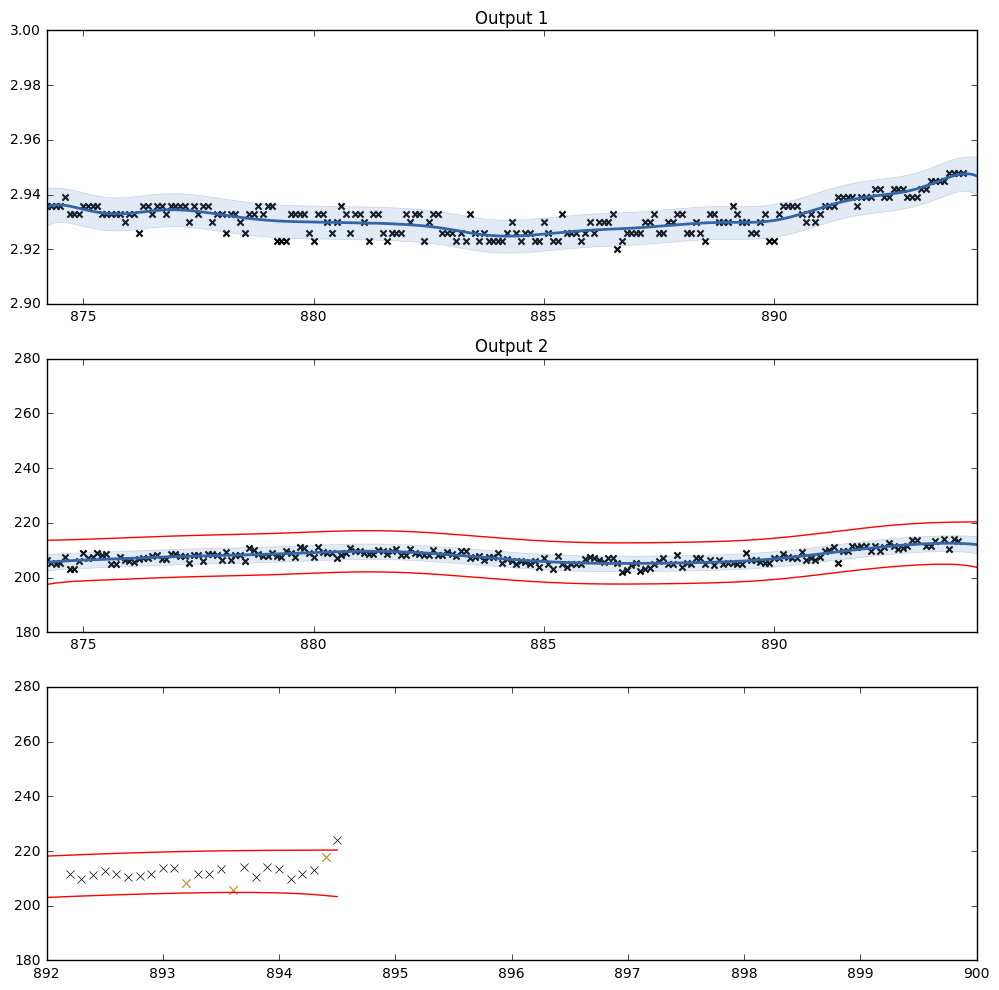

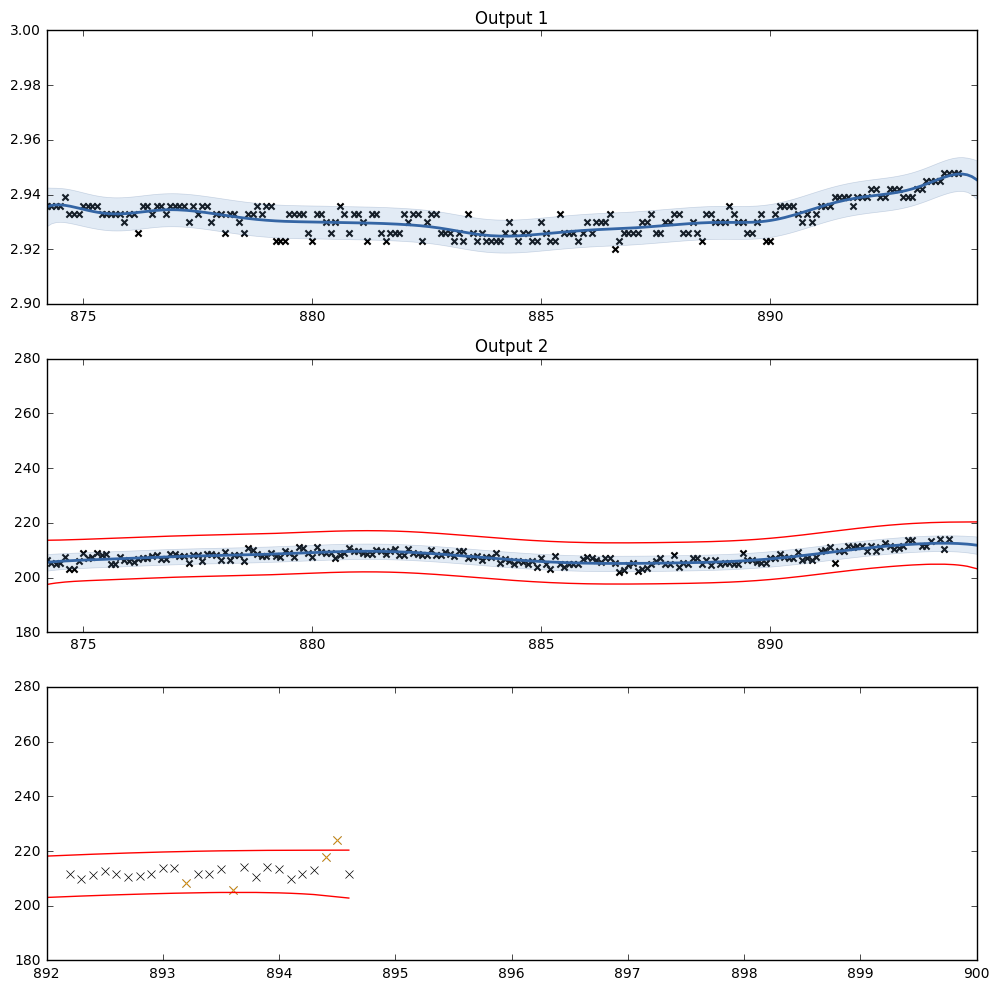

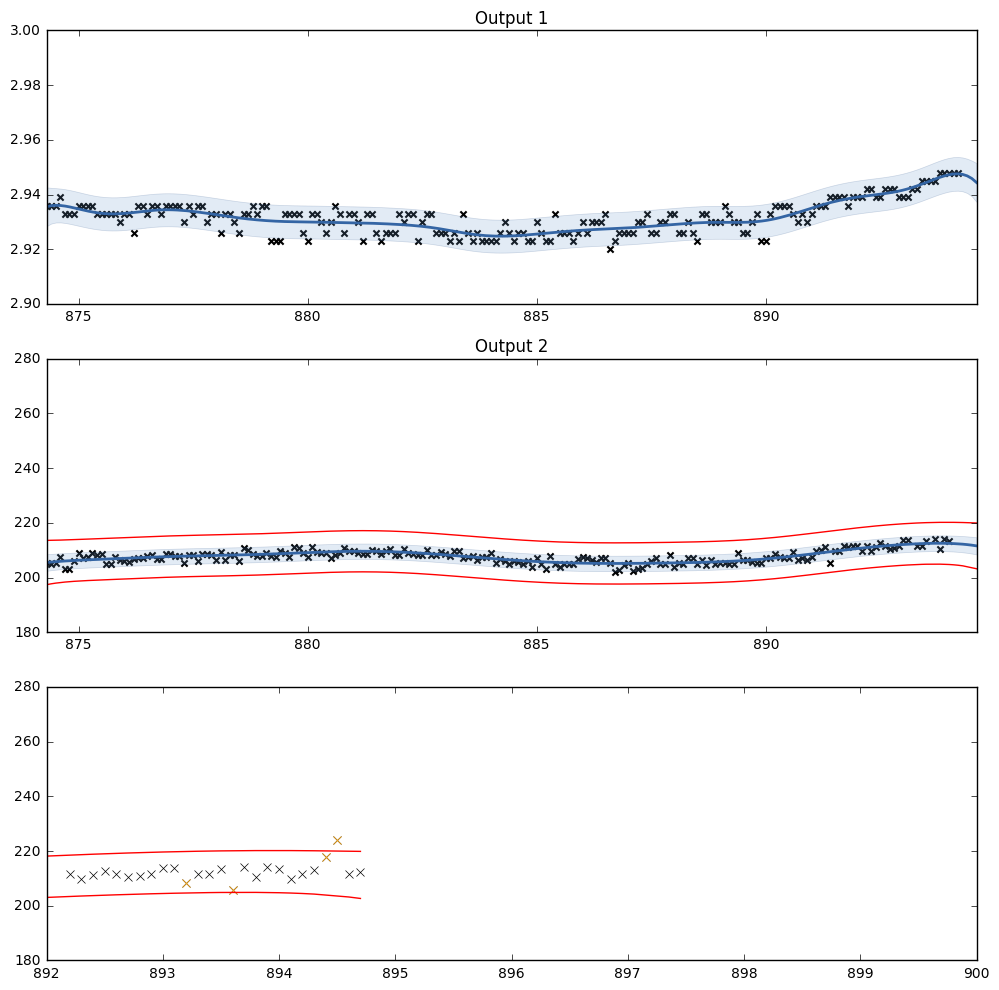

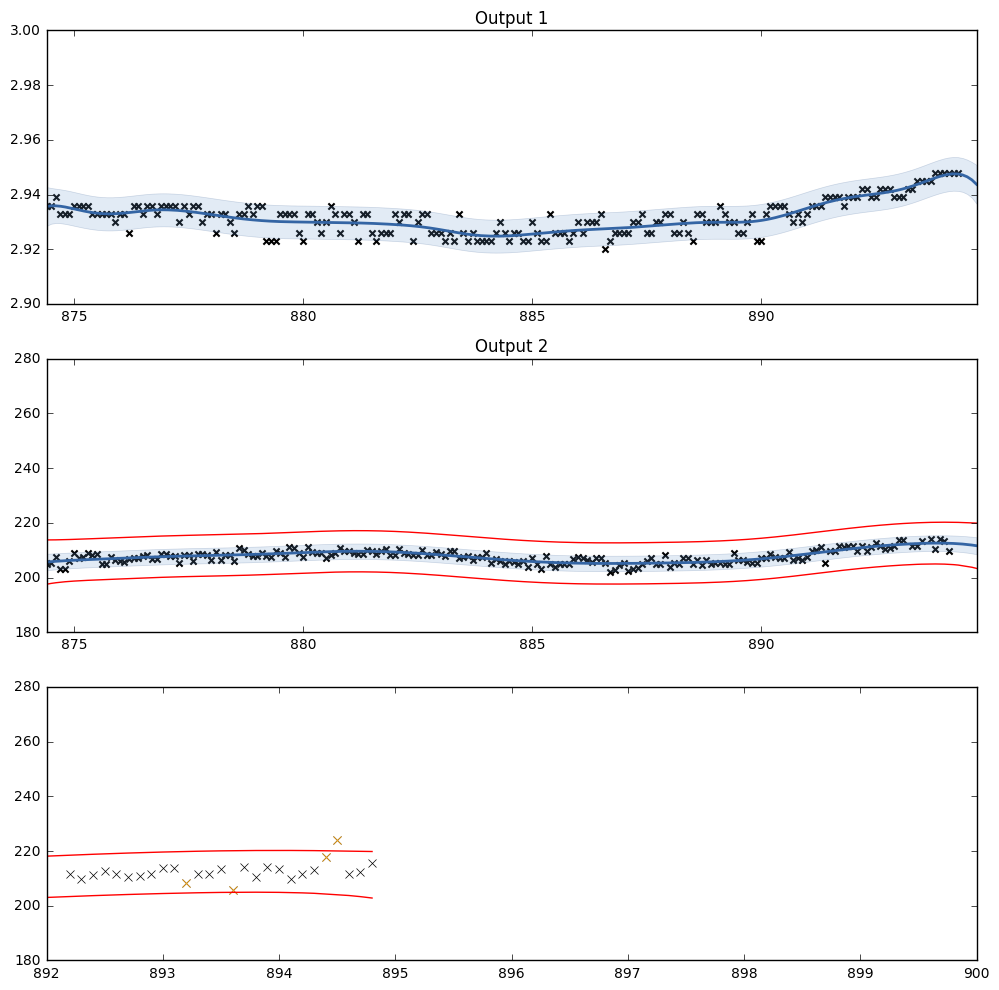

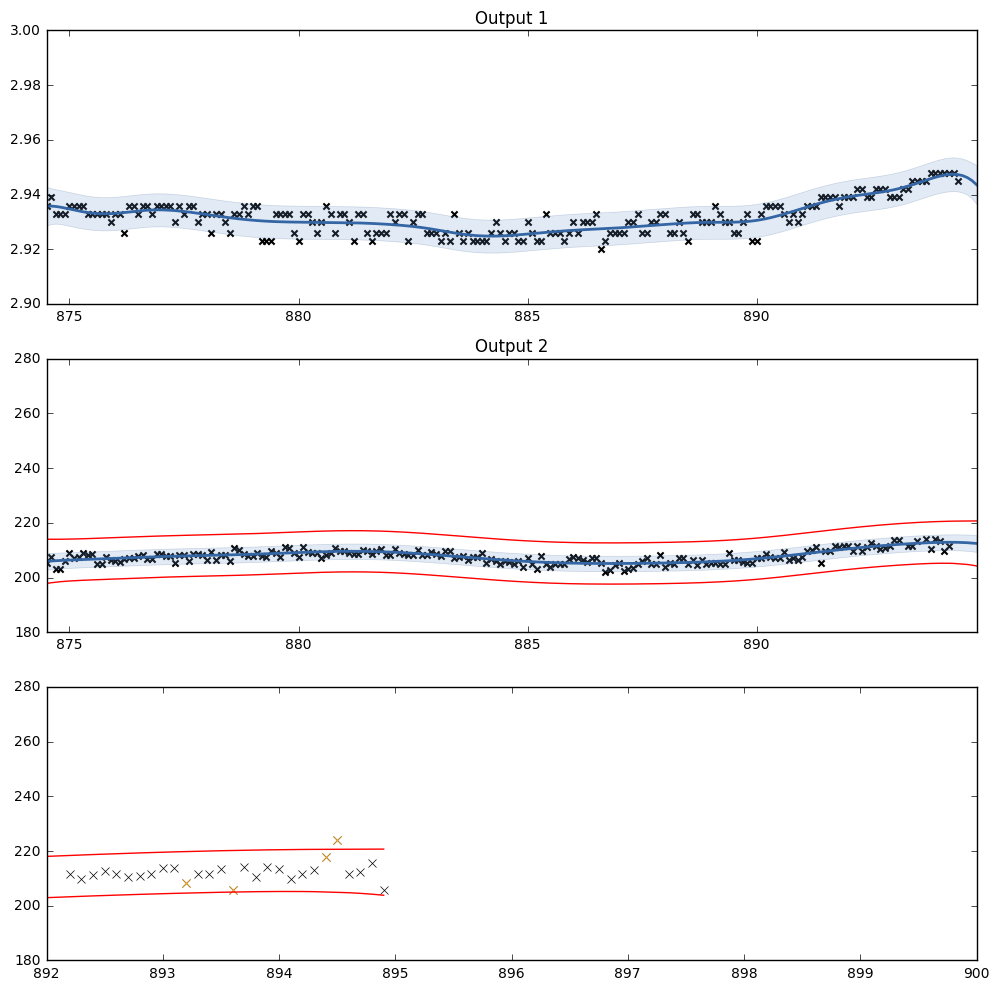

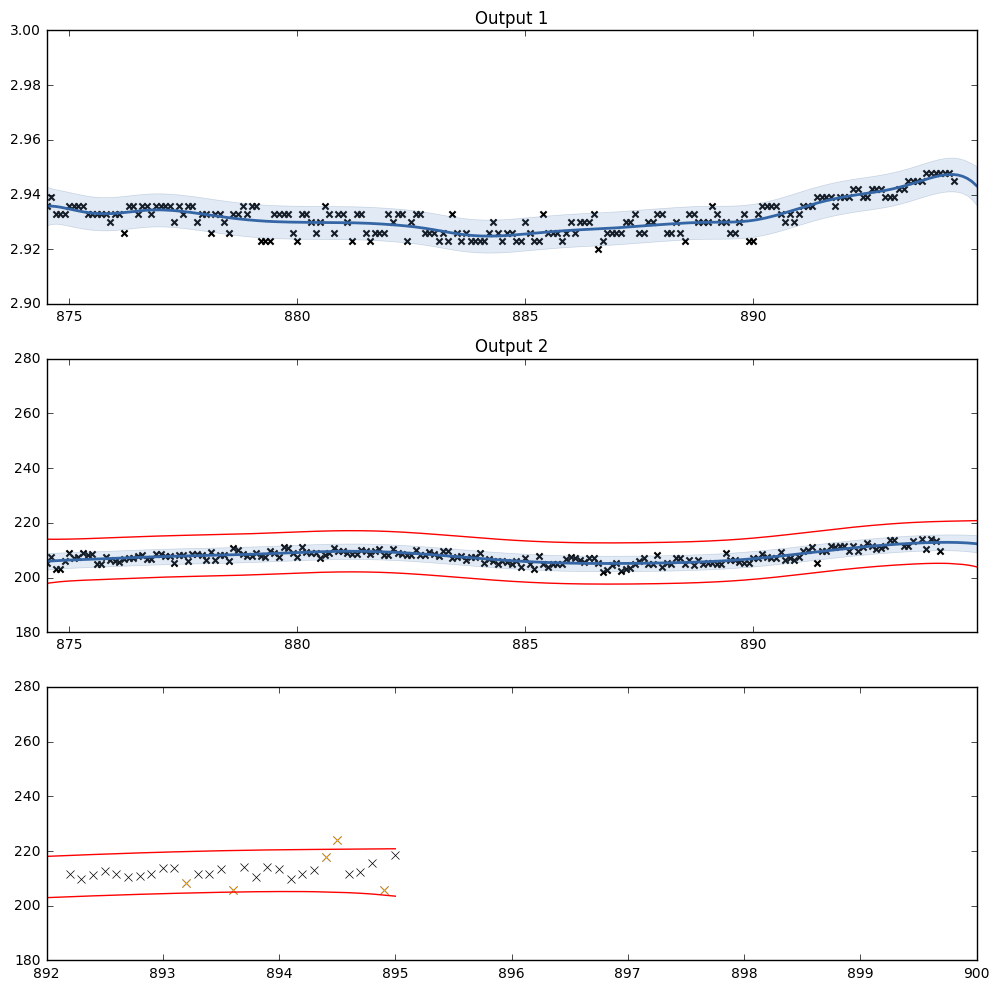

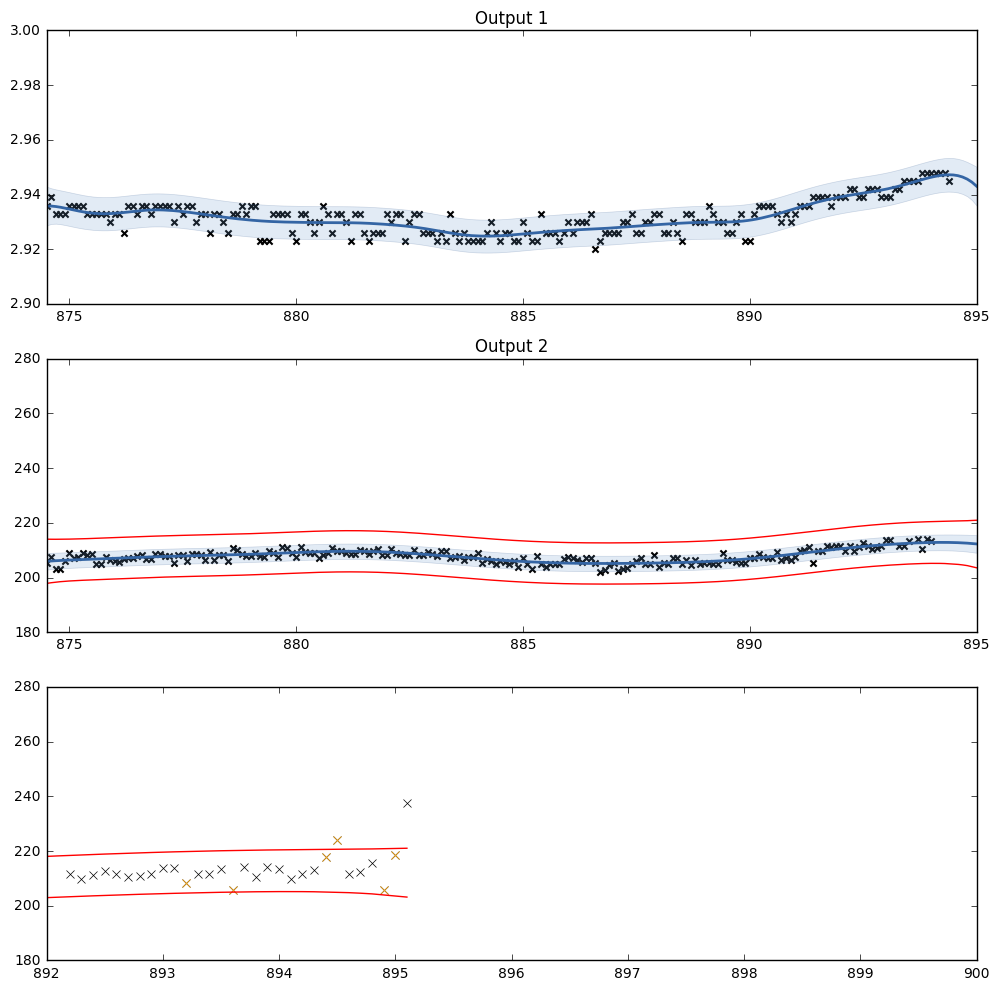

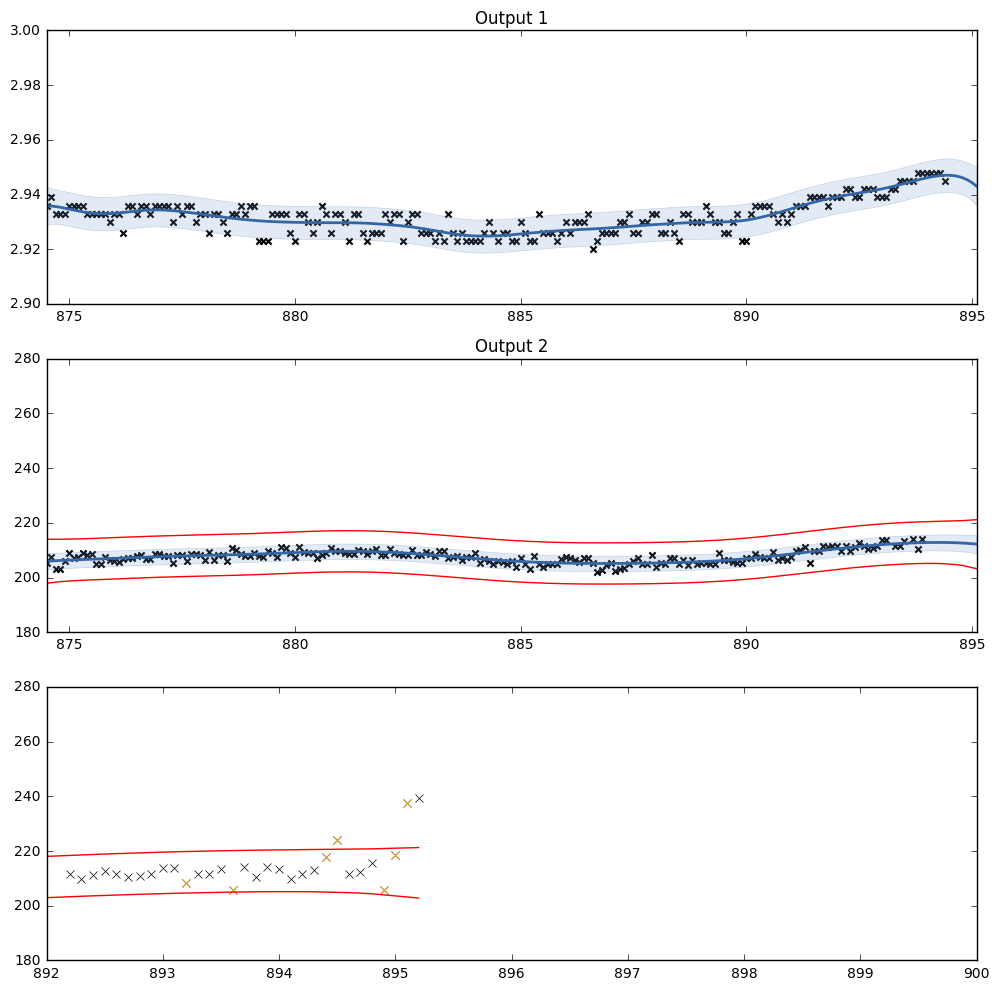

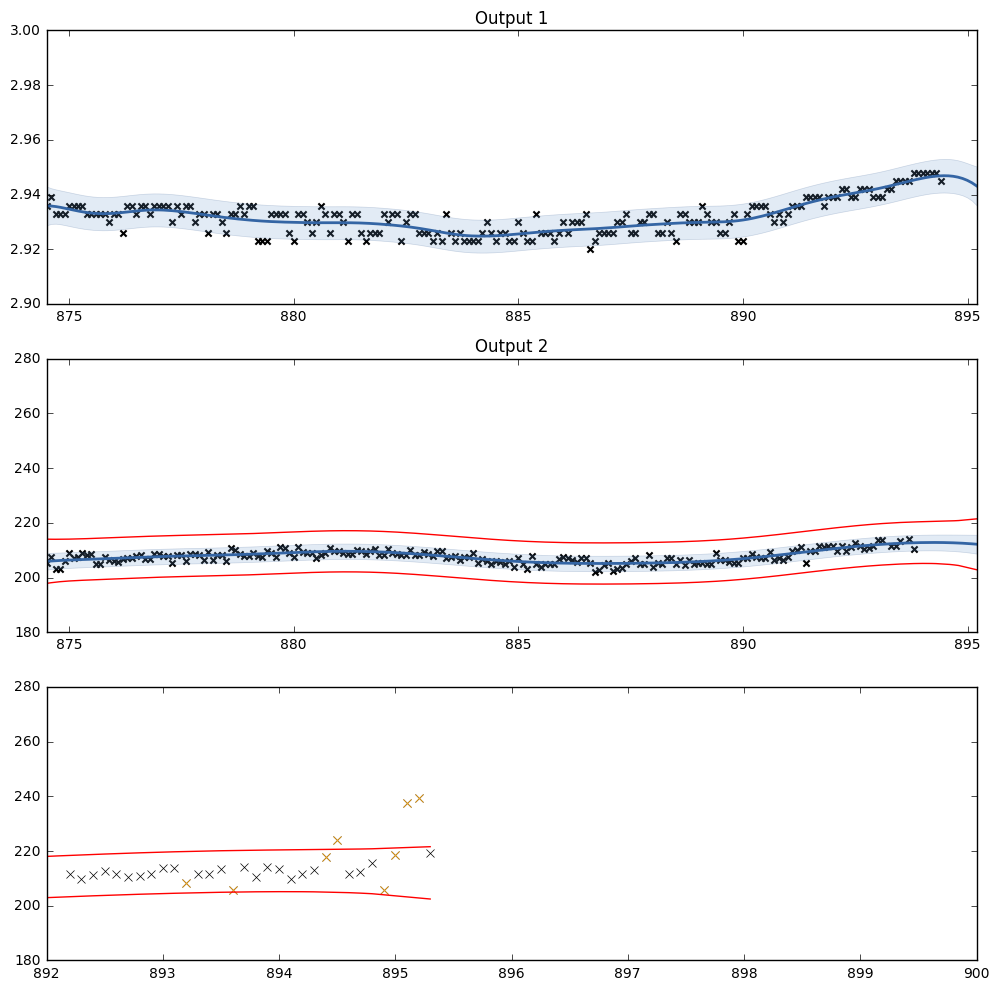

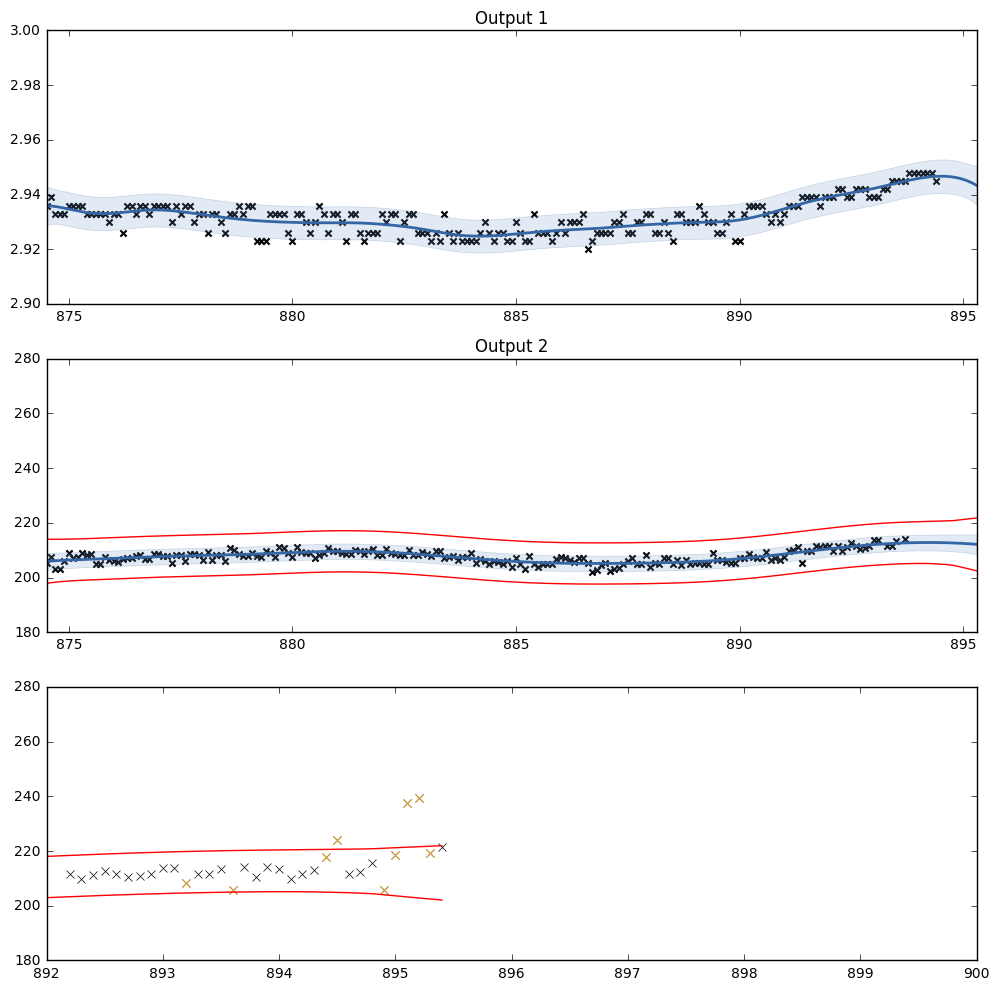

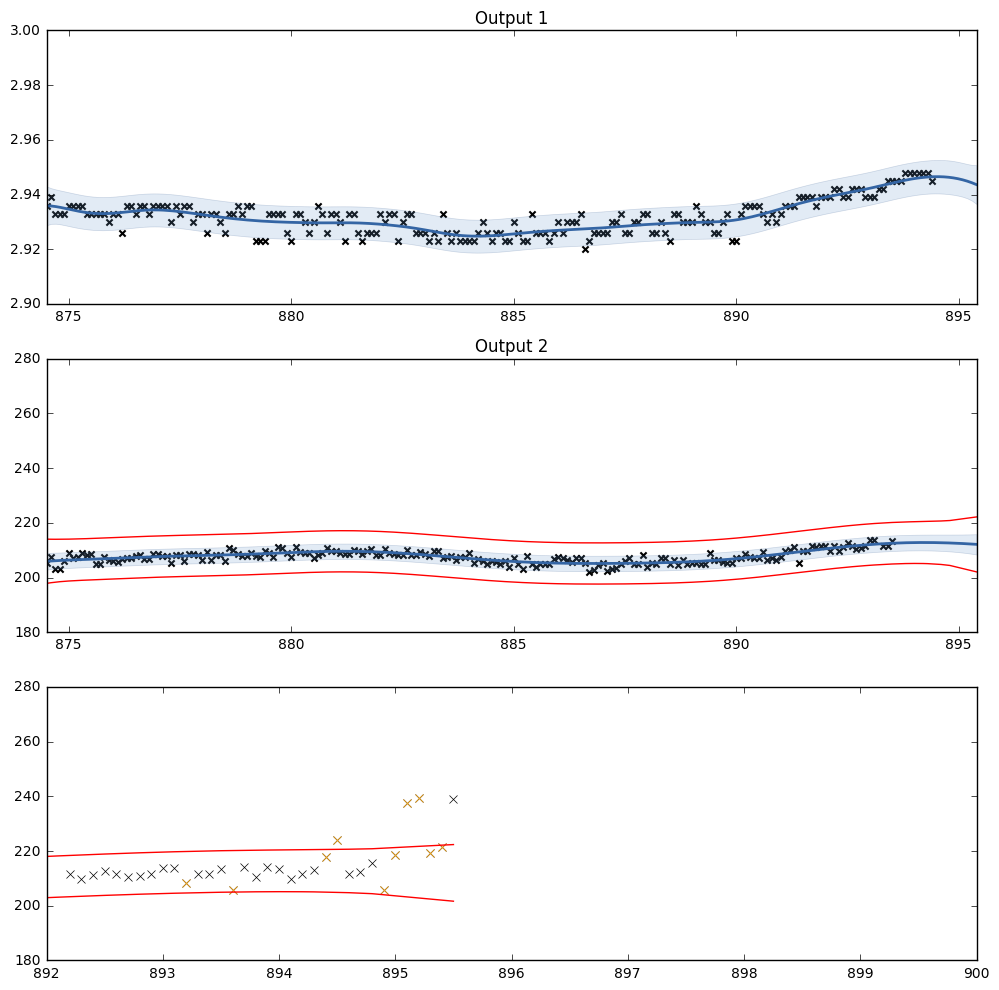

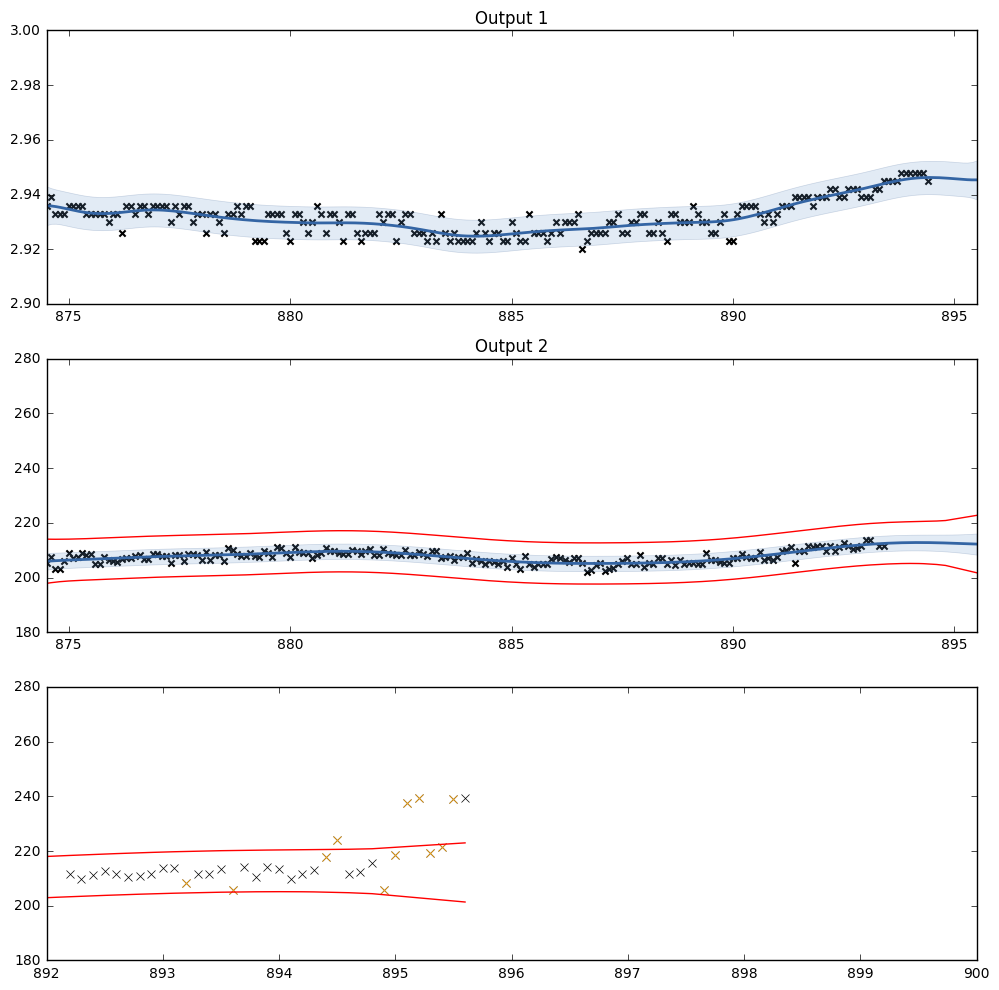

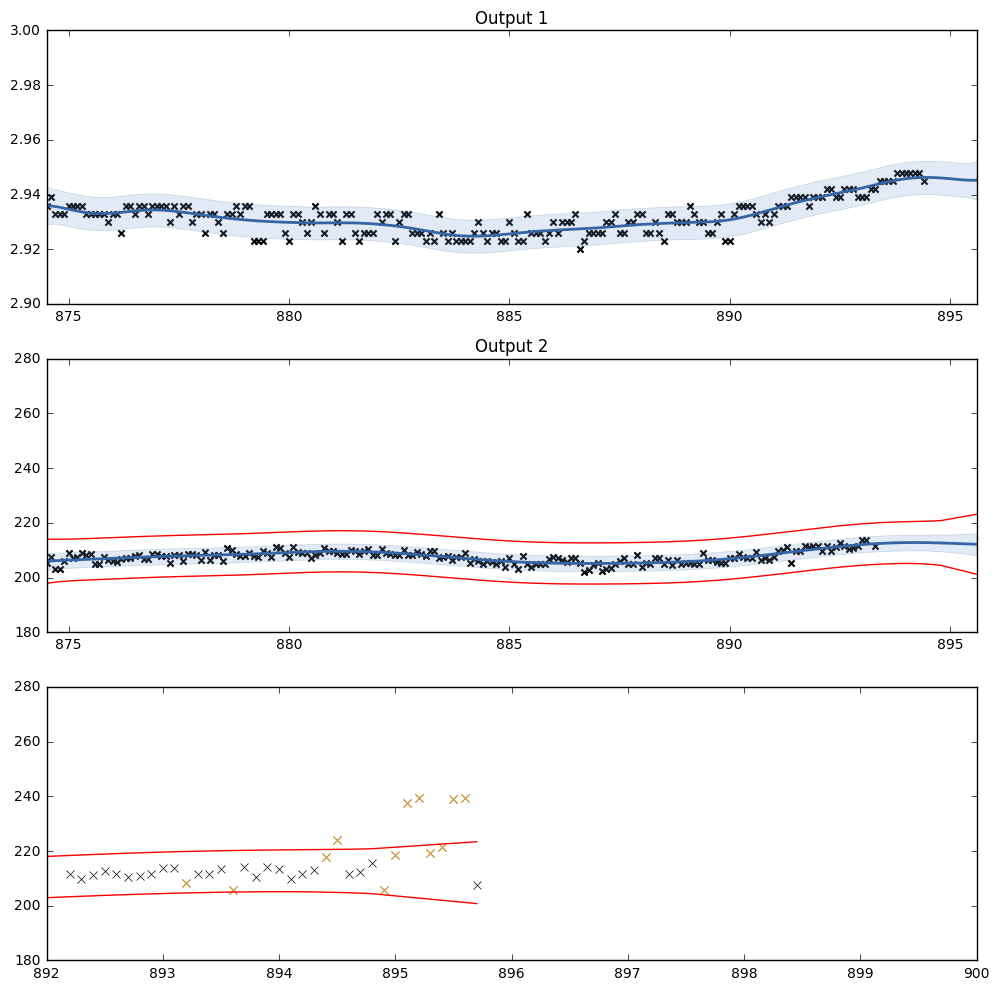

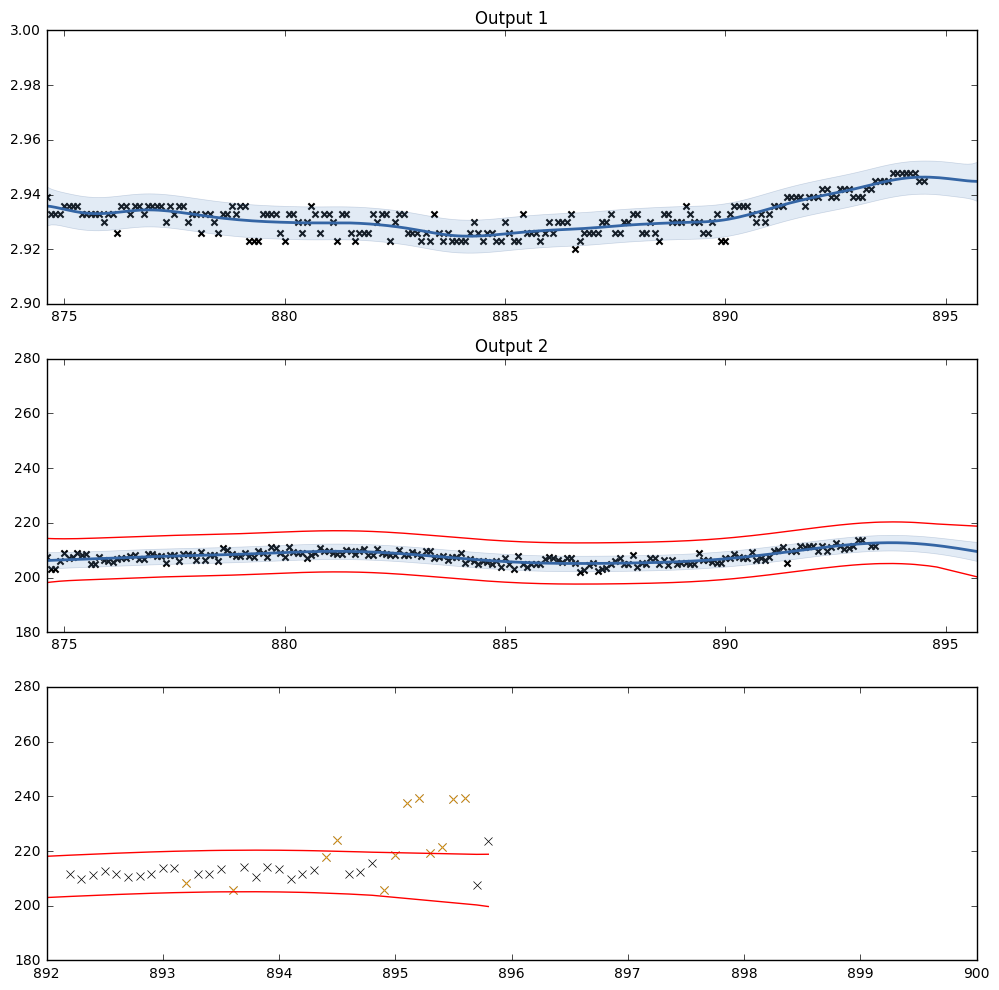

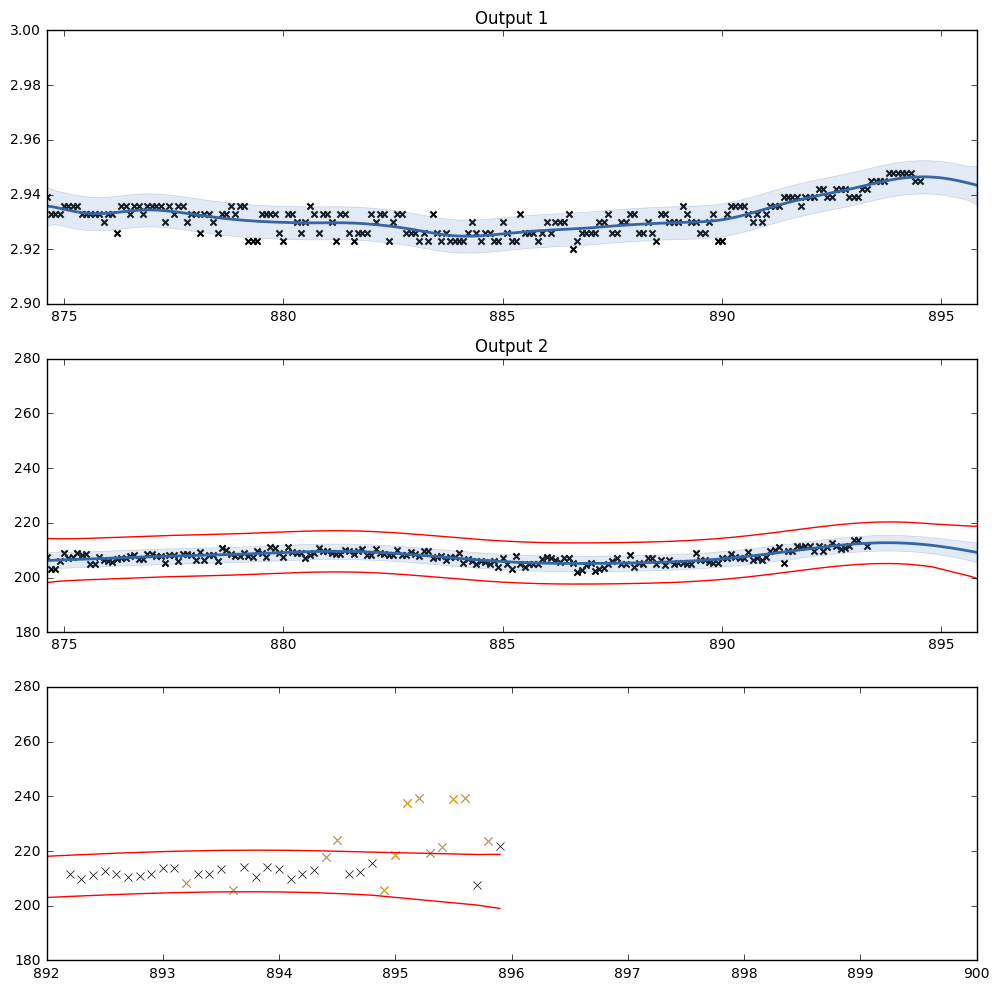

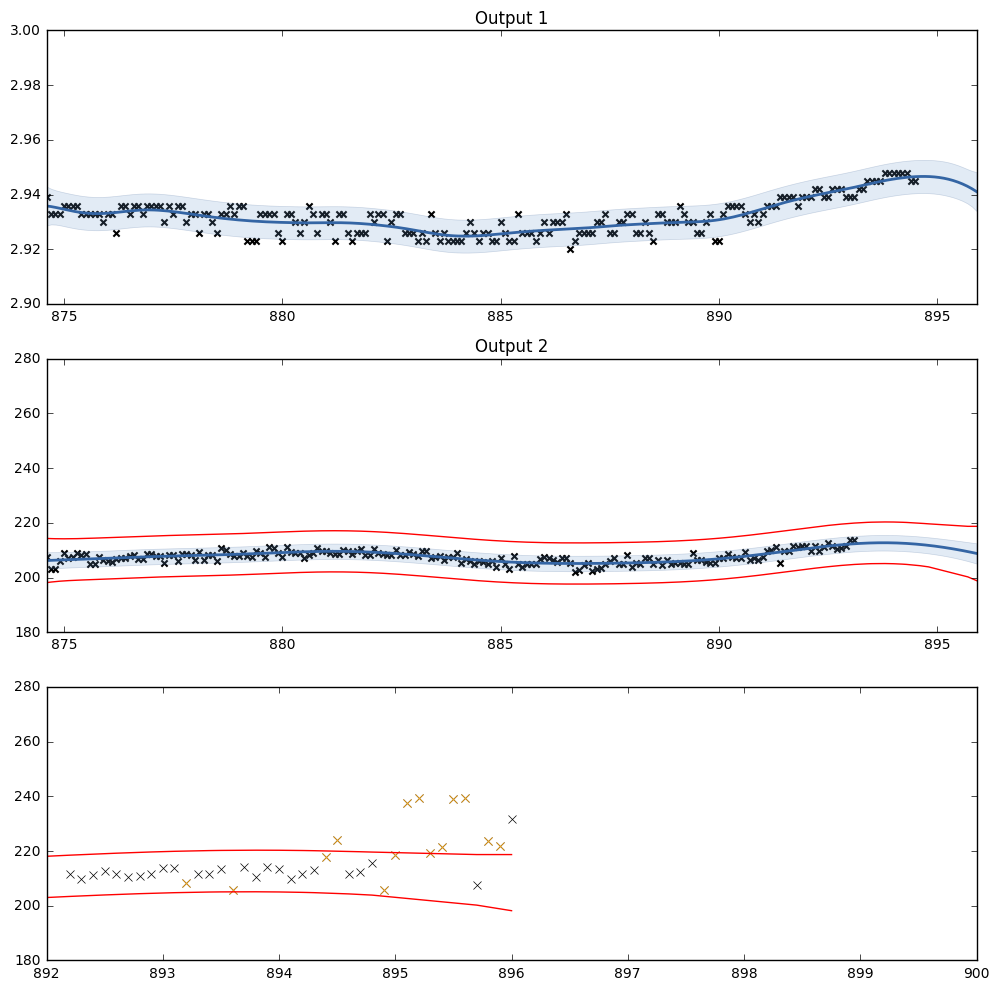

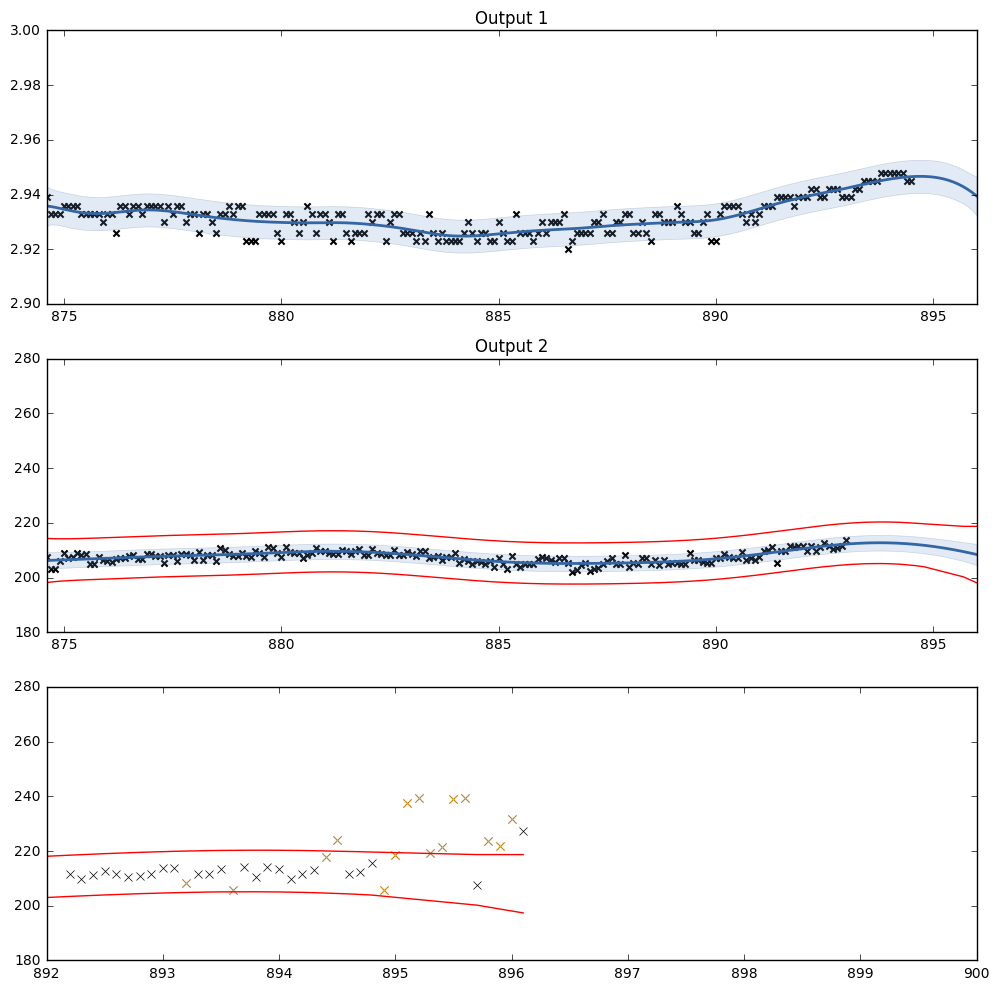

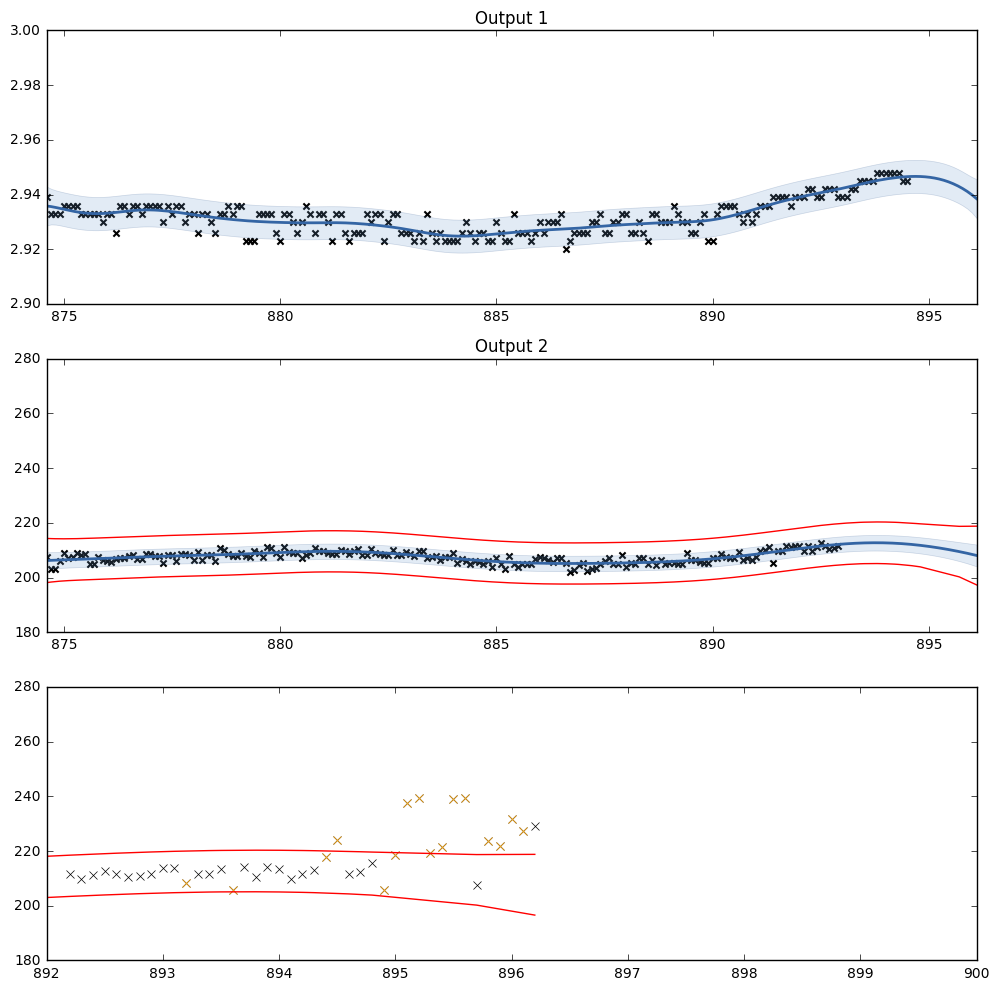

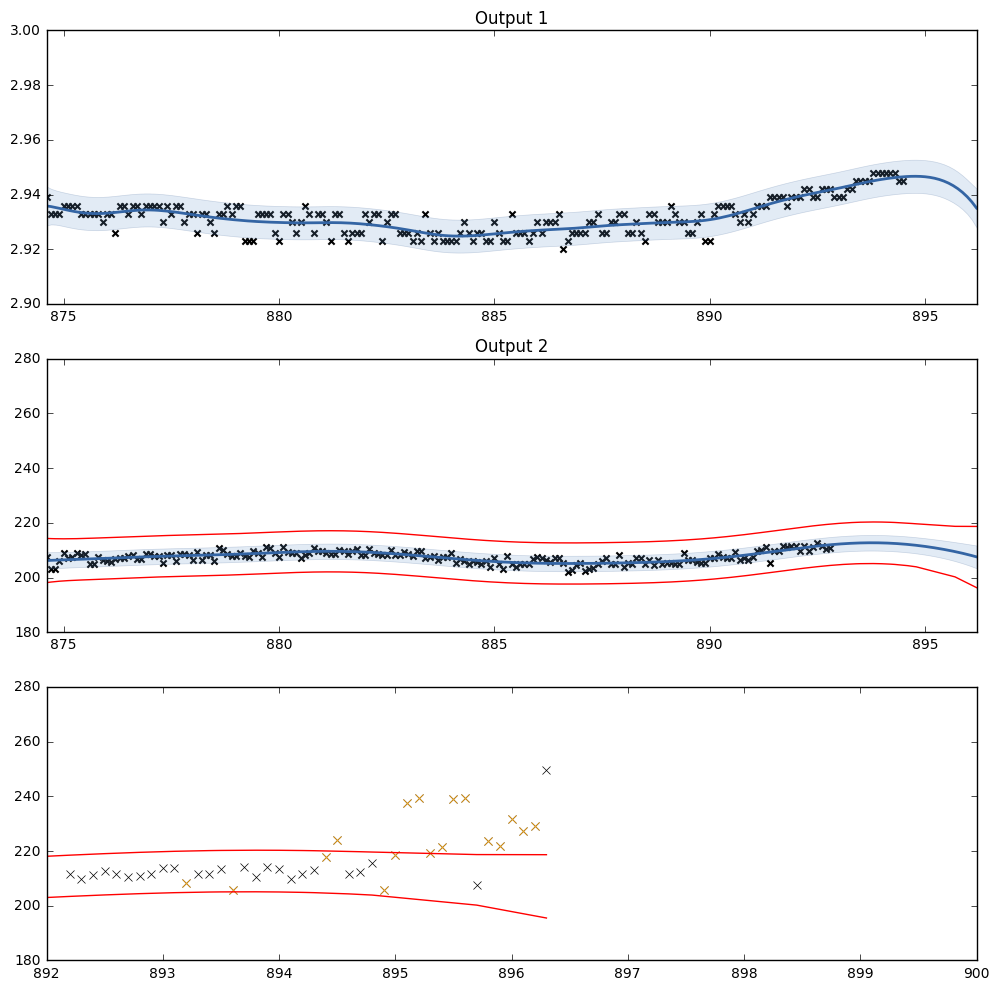

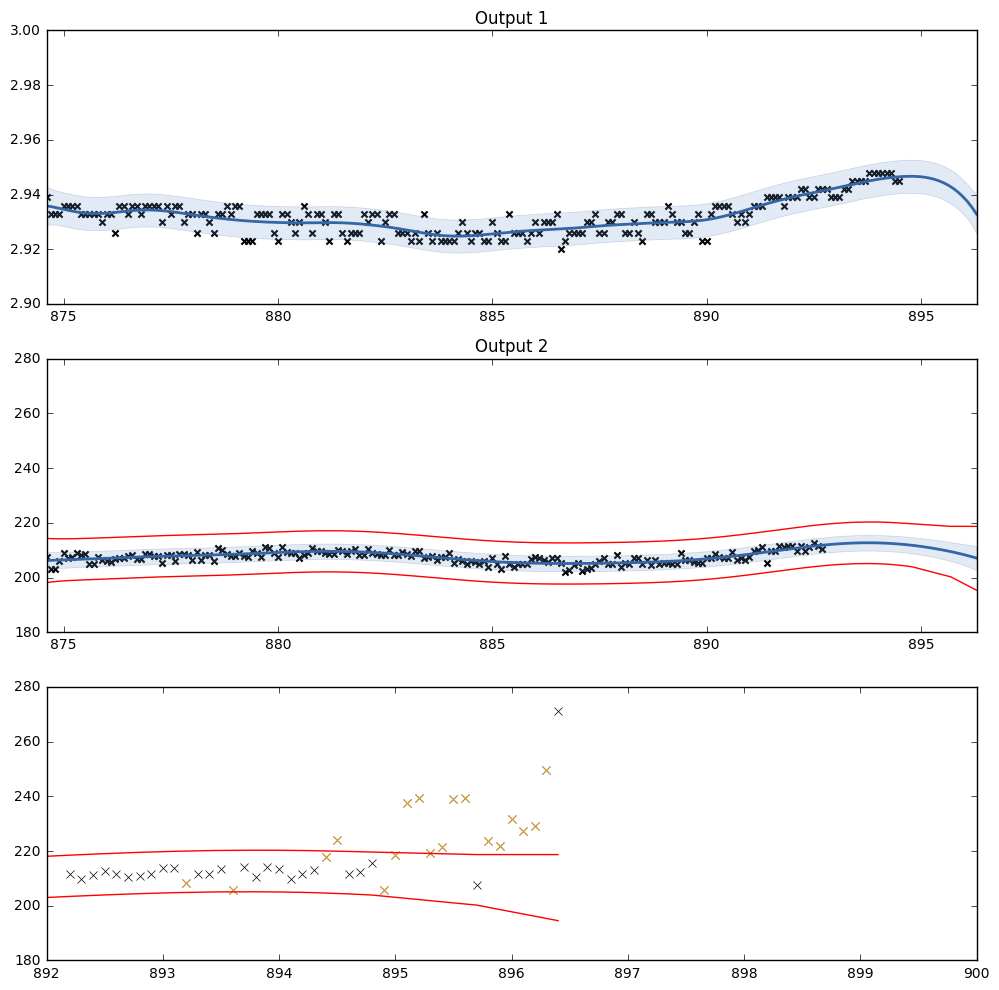

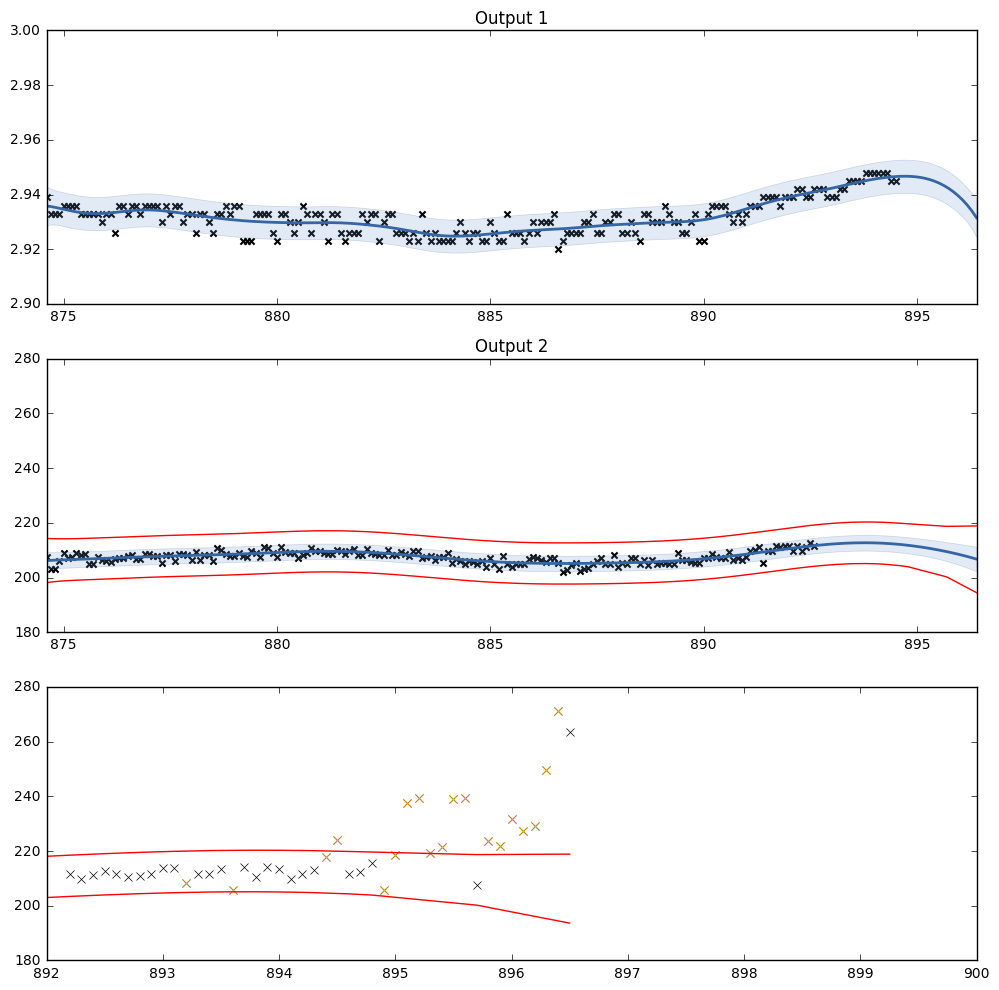

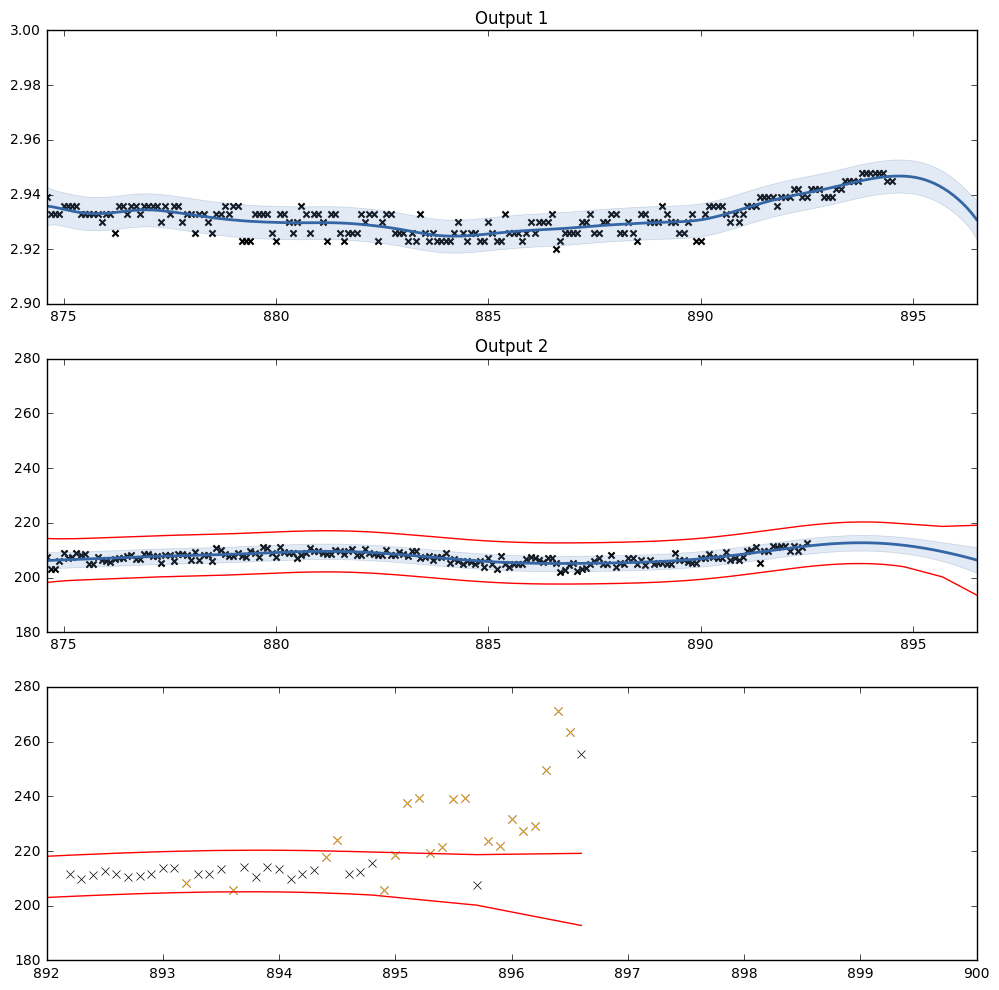

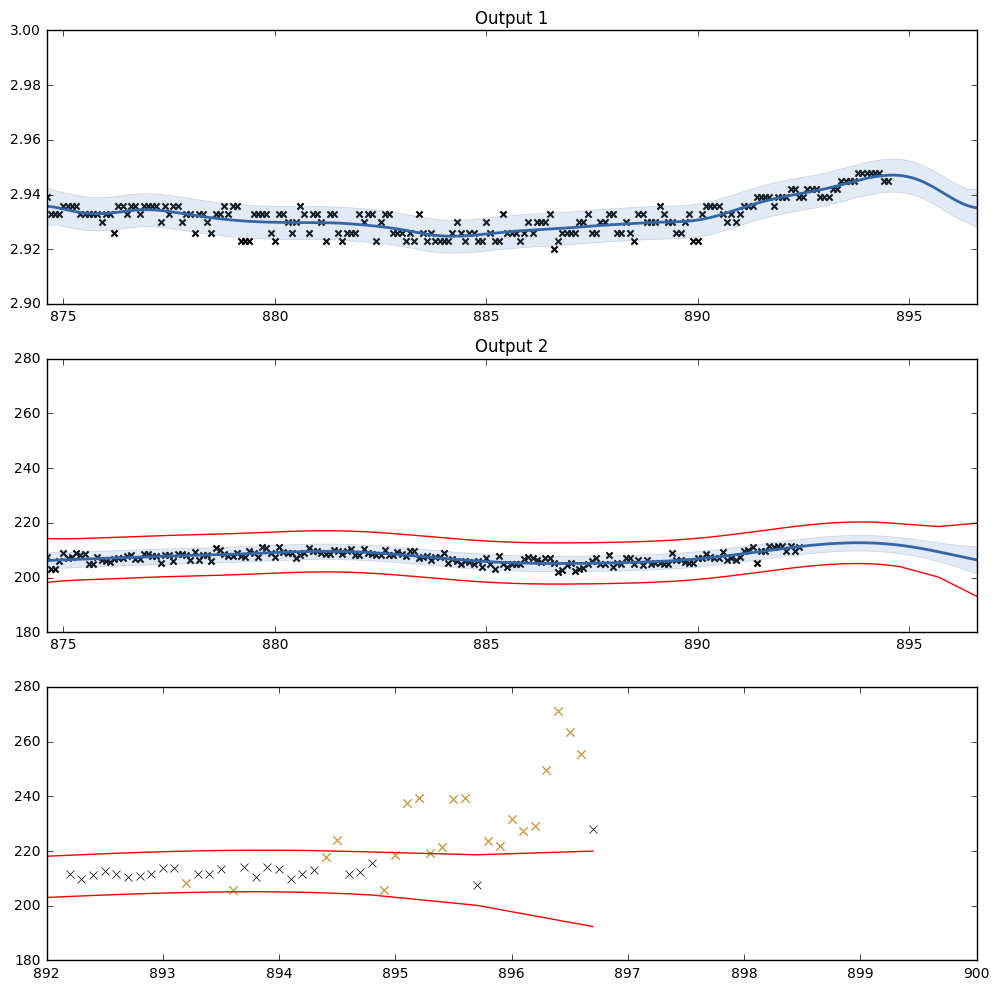

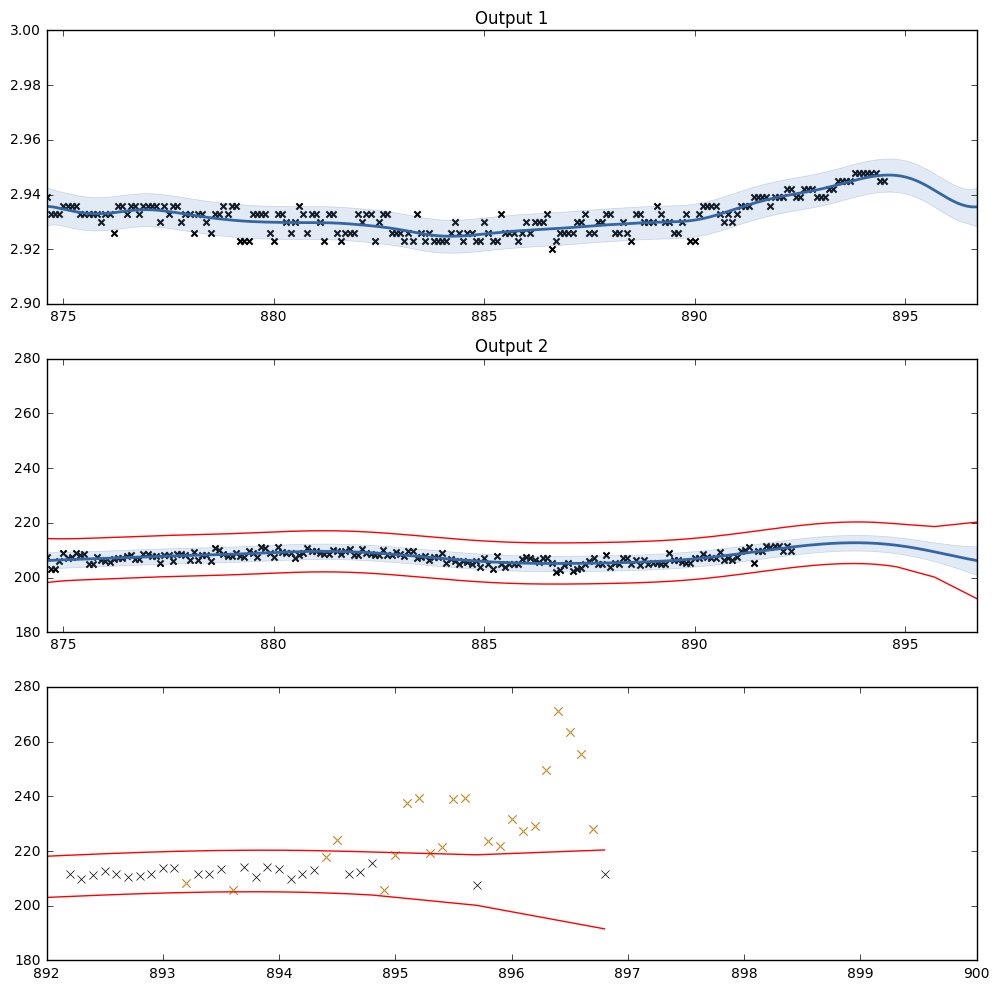

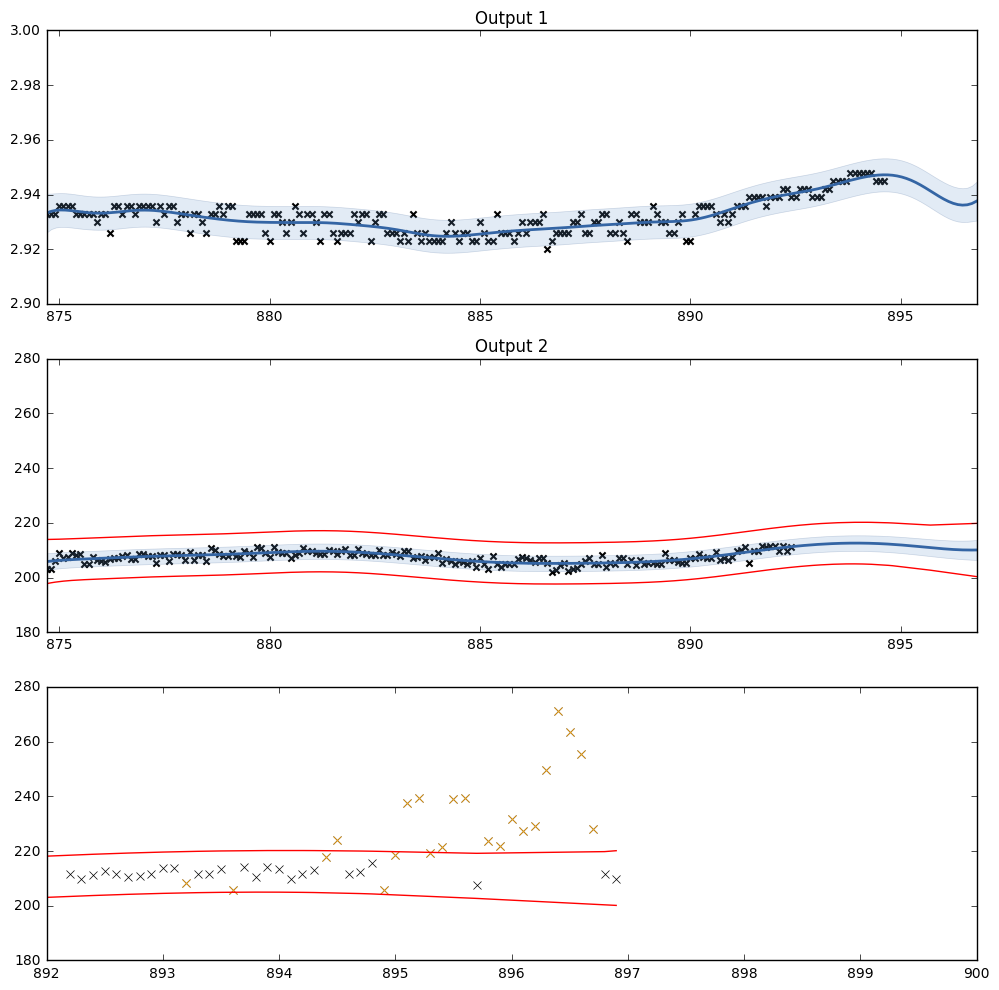

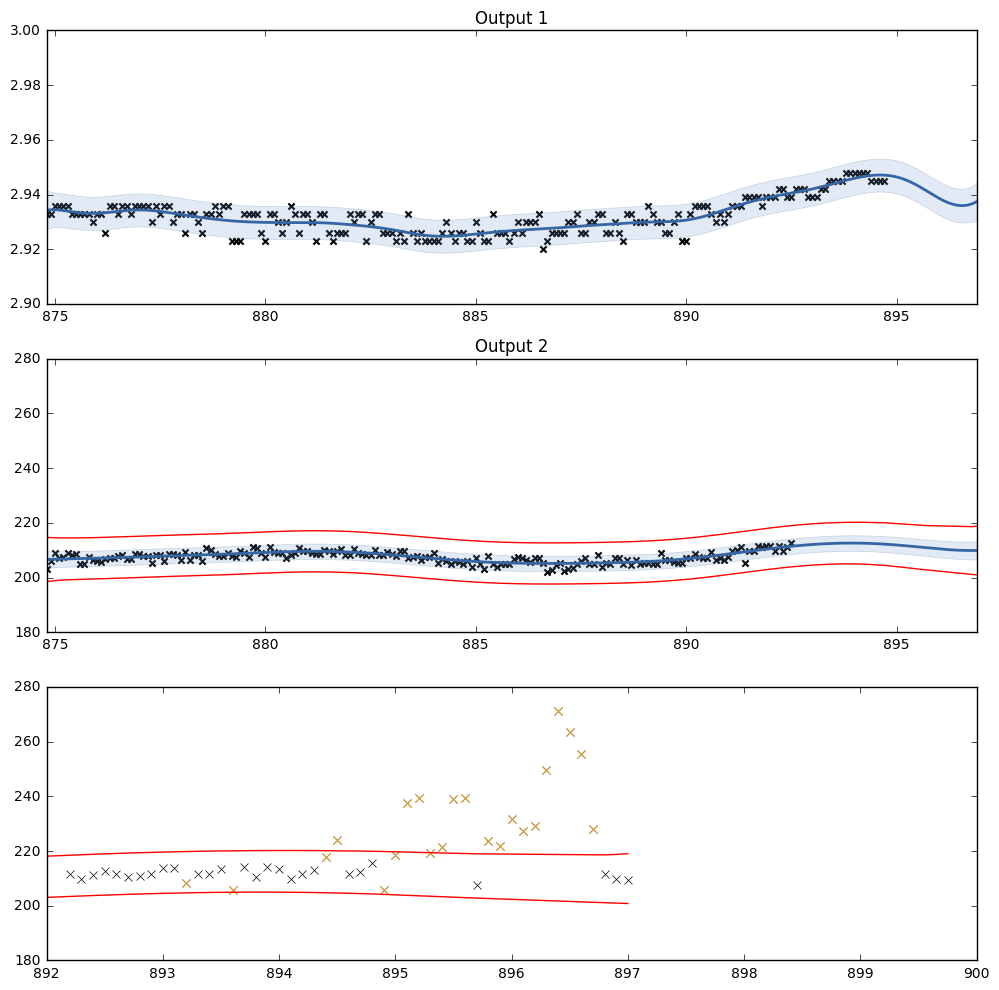

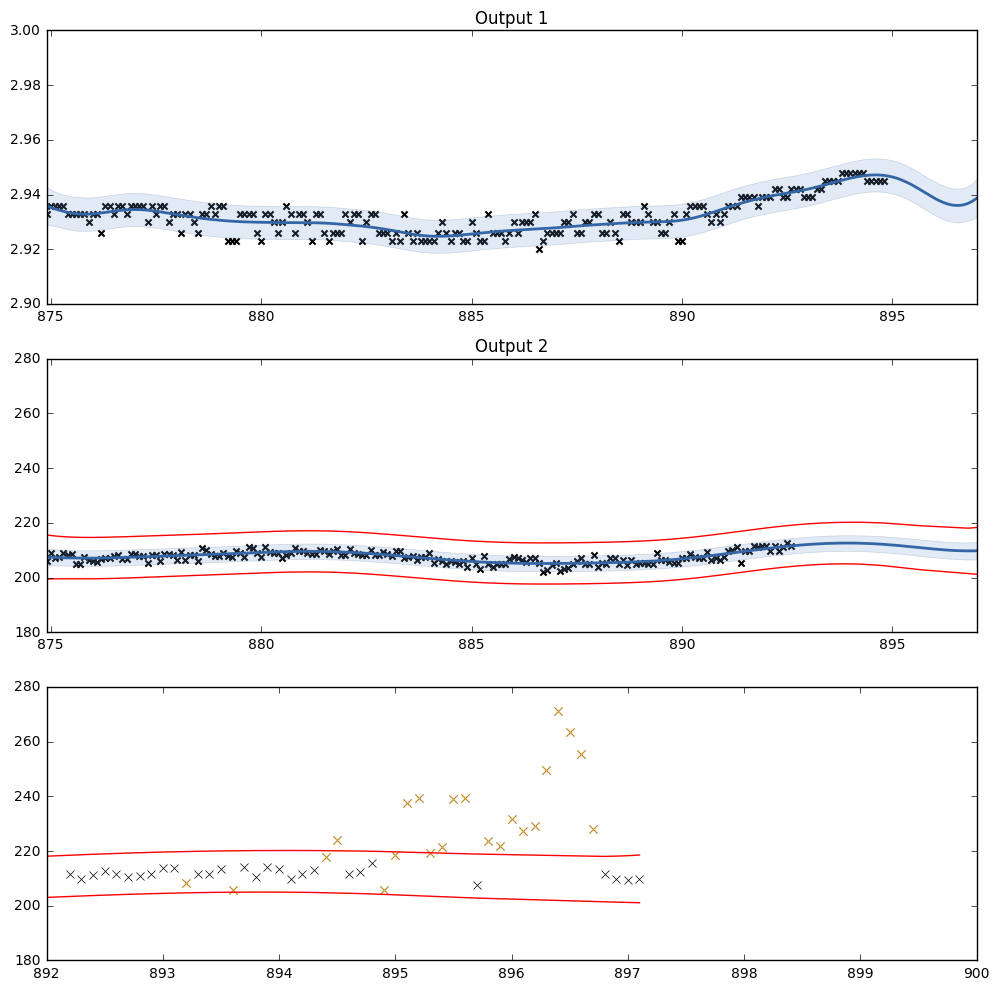

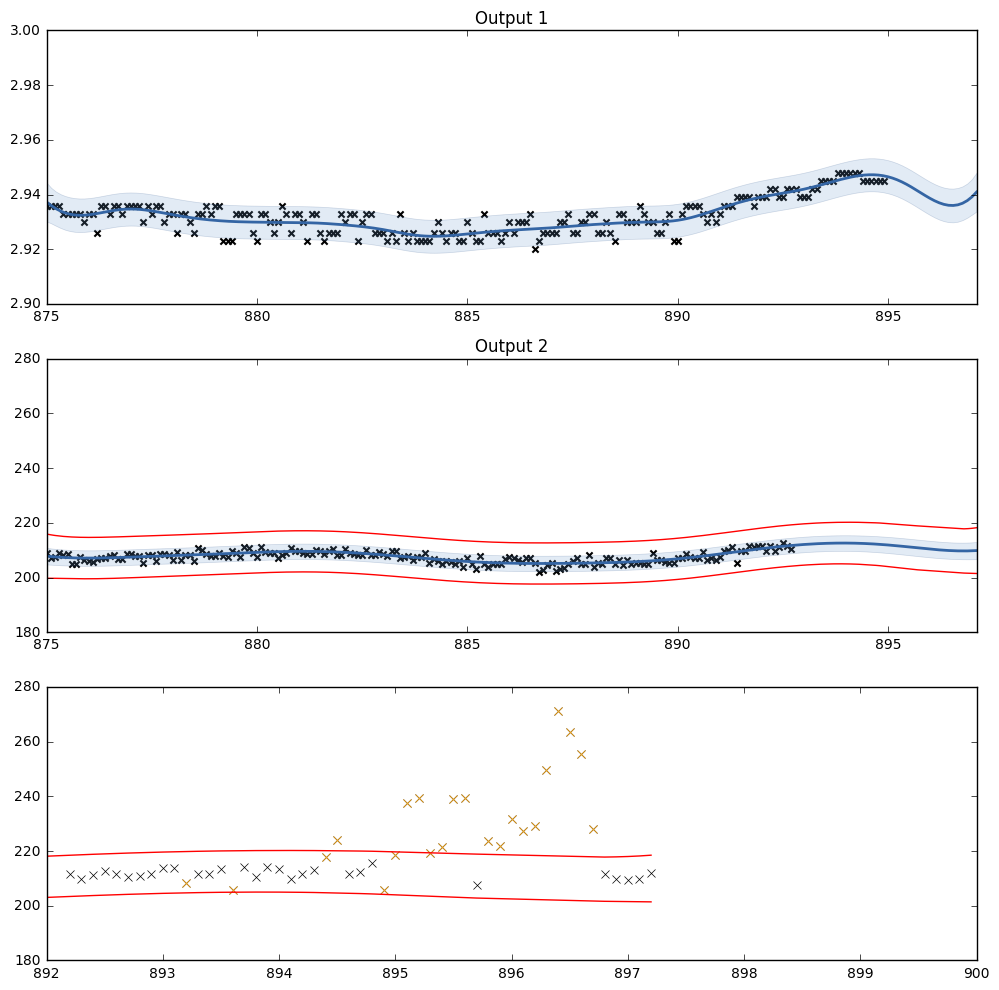

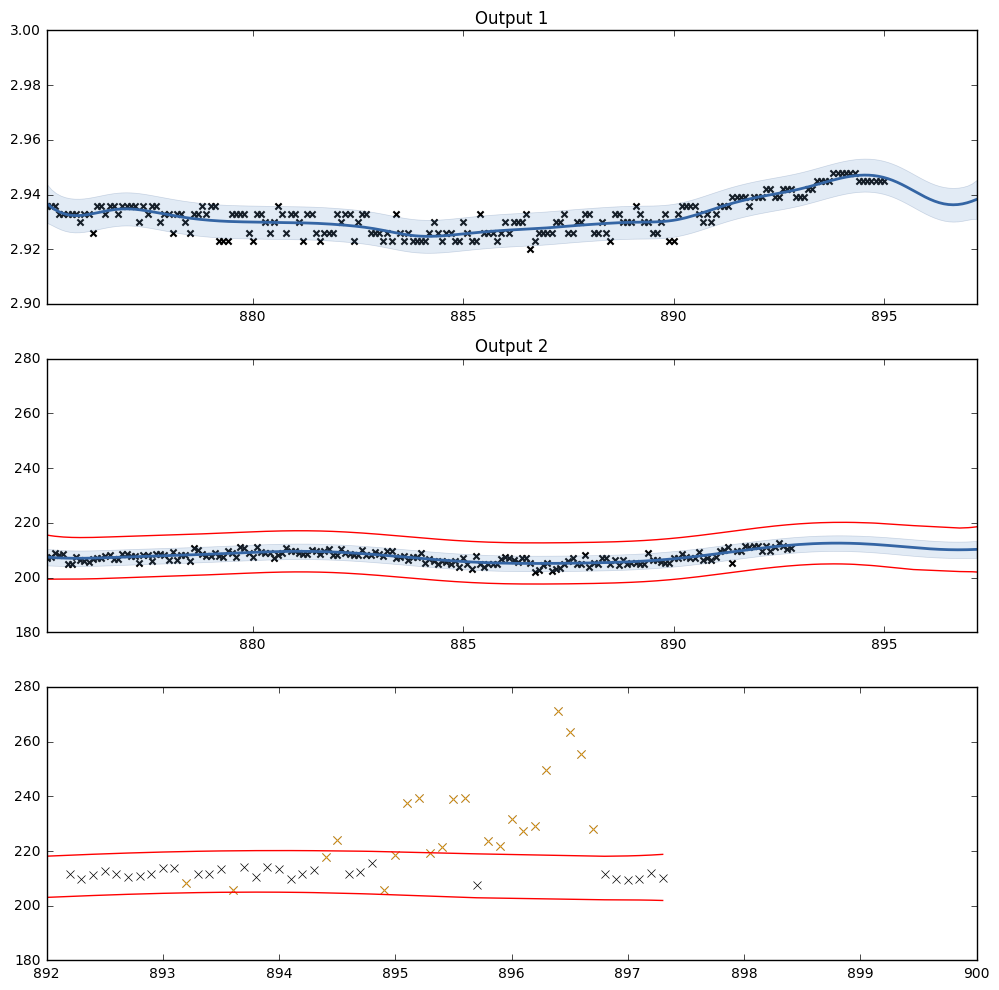

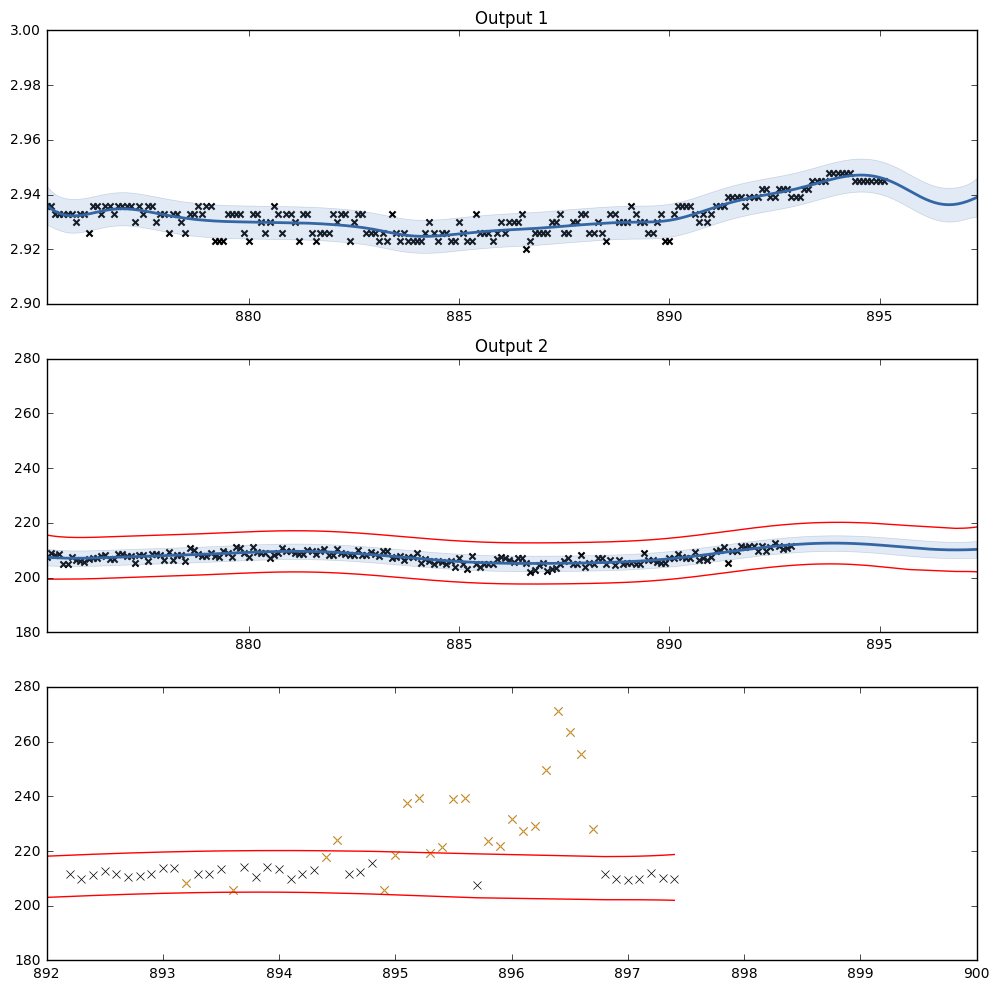

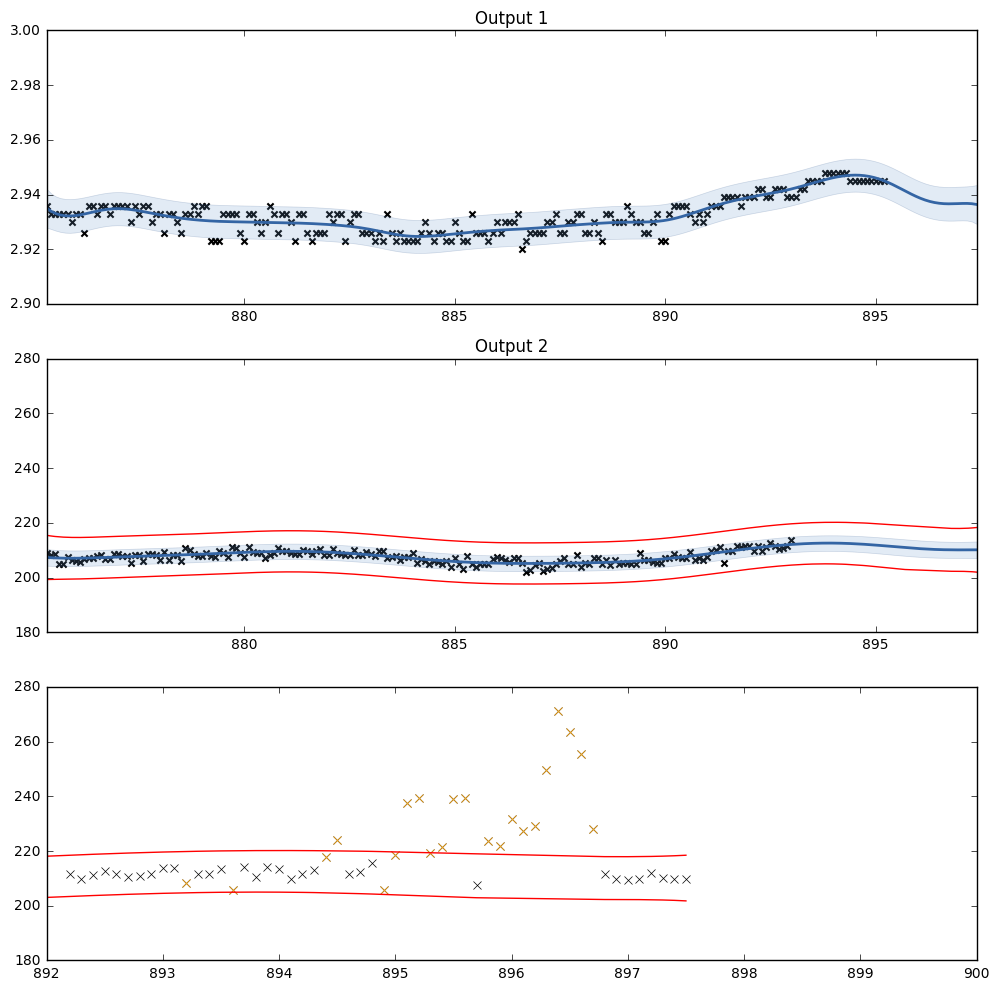

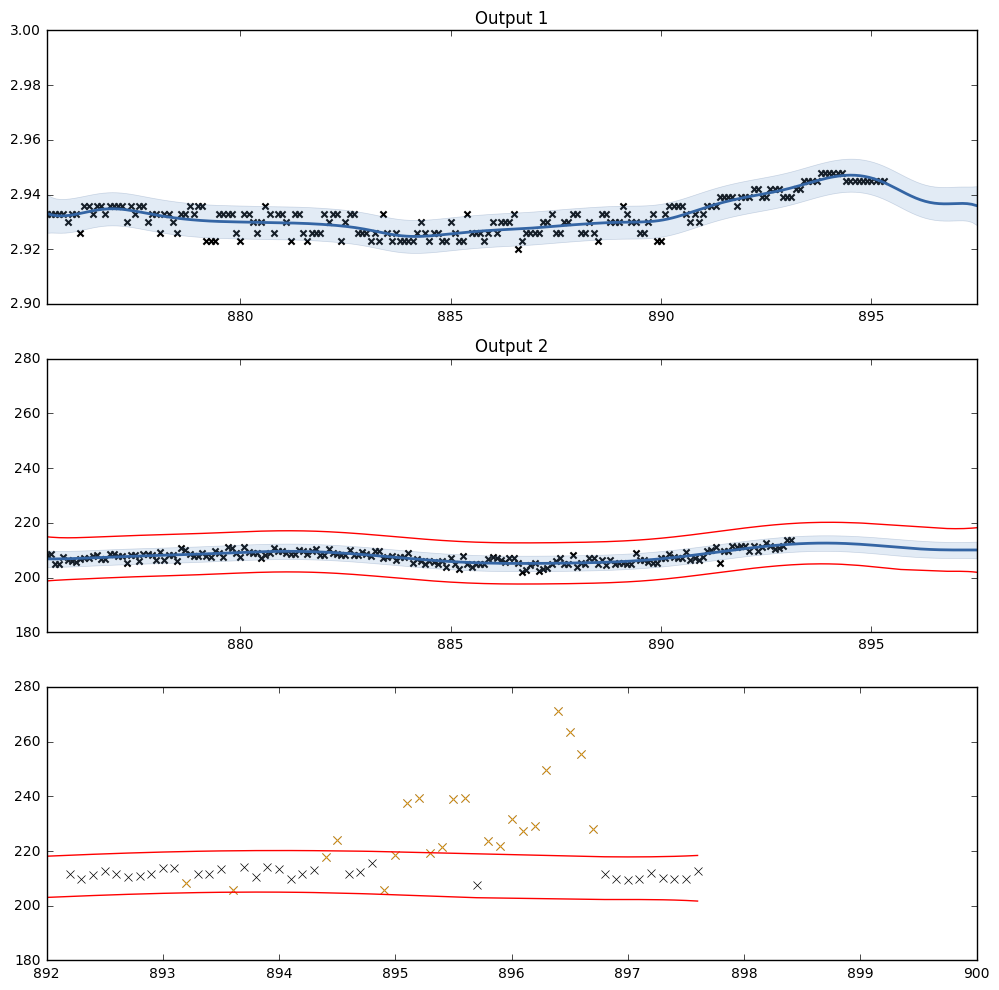

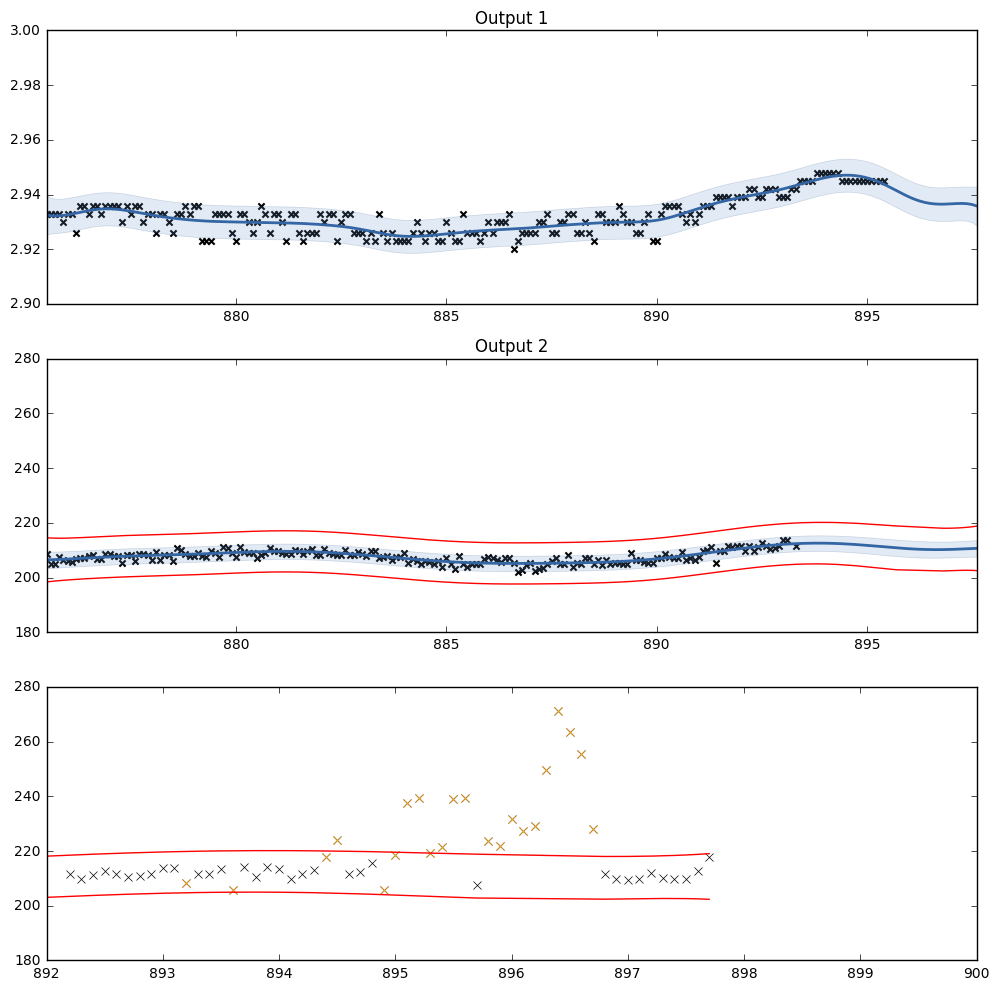

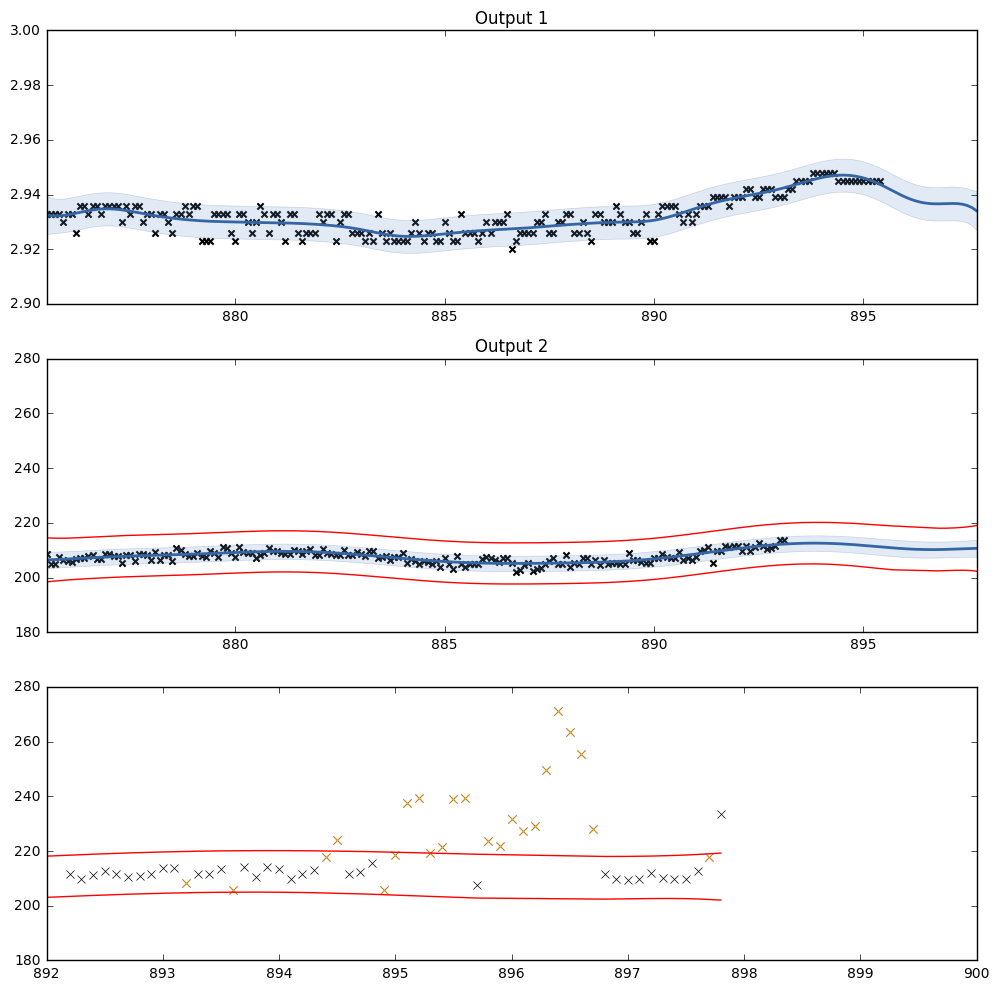

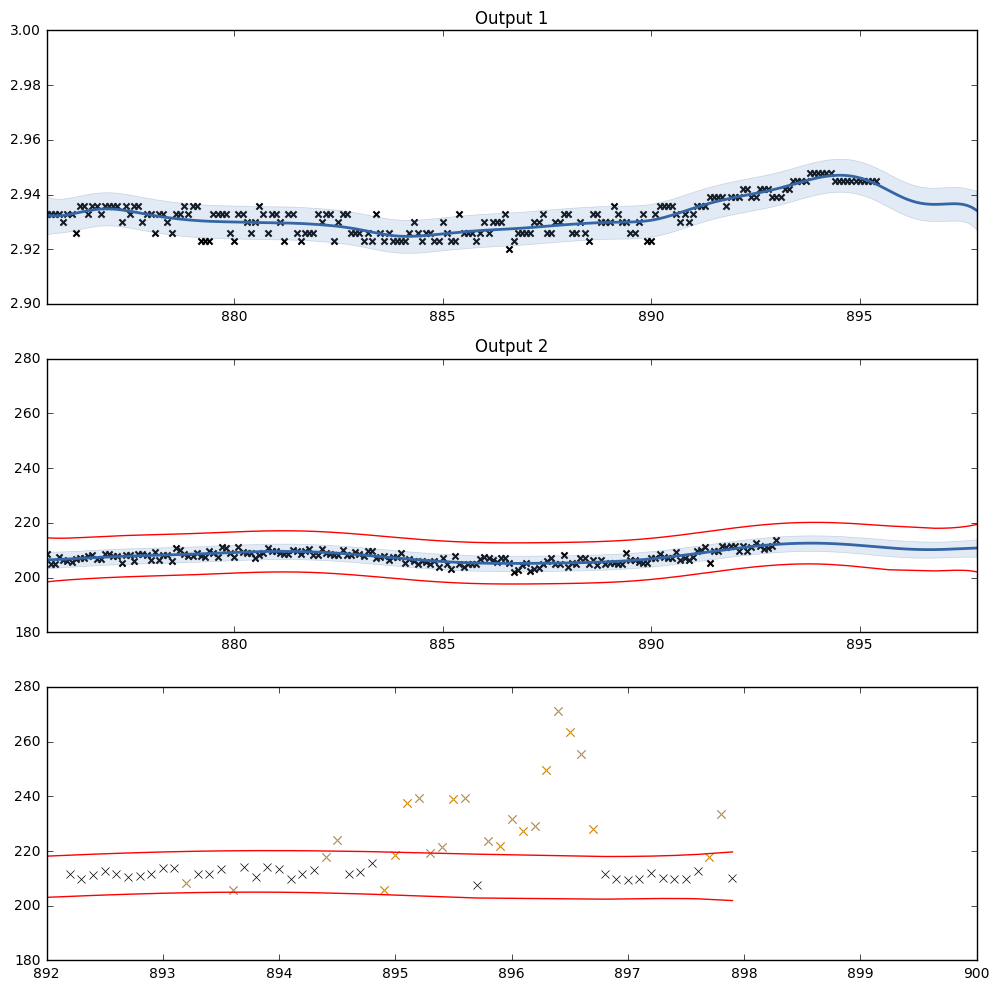

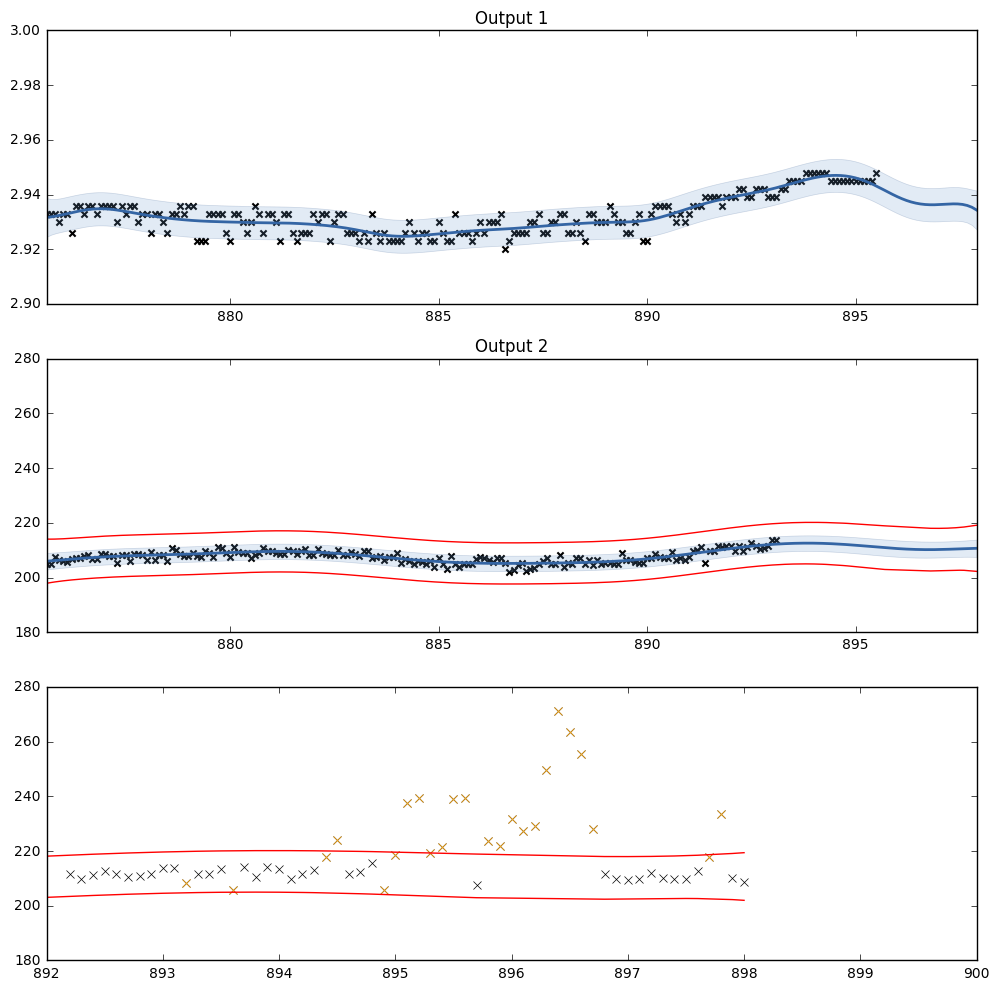

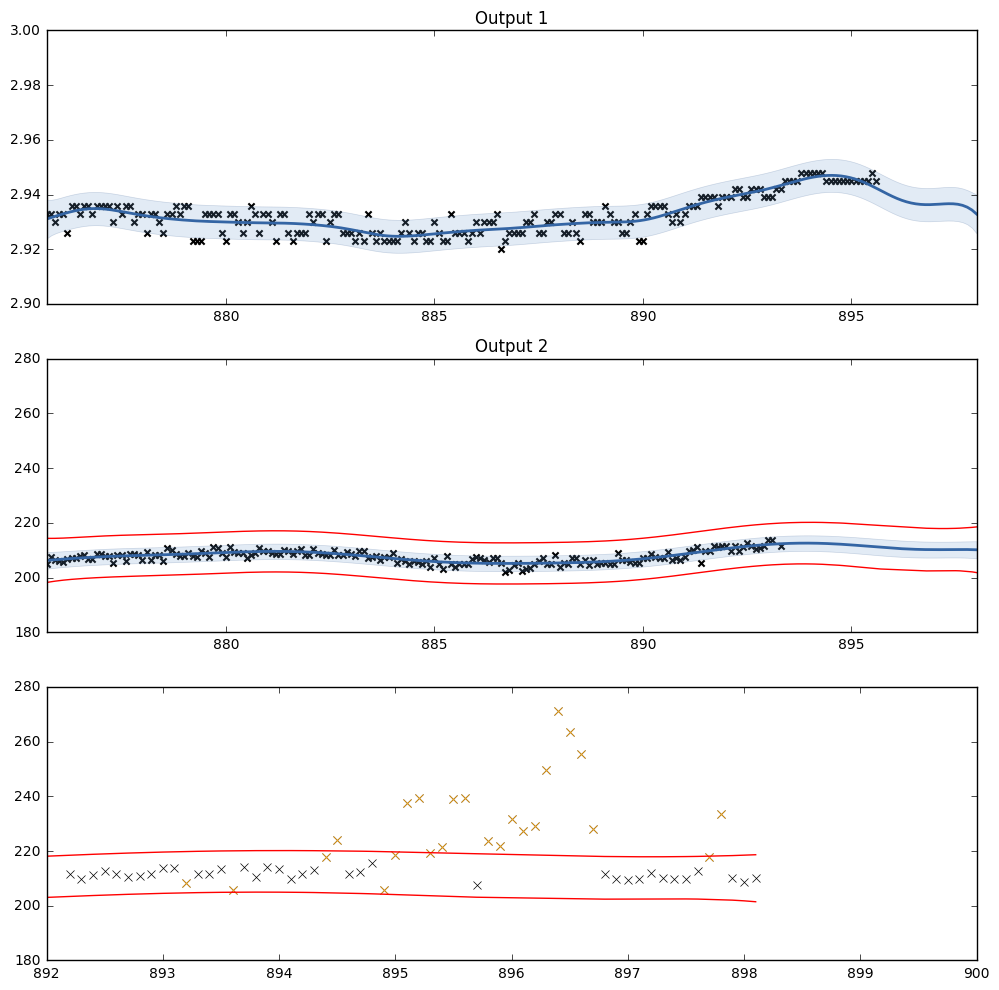

In [9]:
s = 8722
l = 200
t = 10
it = list(range(s,s+l))
kt = it.copy()
anomal_points = []
test_points = []
score_list = []
score_index = []
kern = gp.kern.copy()
step = 1
# kt - p1의 training set , 1개씩 이동시키는데 EVT에서 anomal로 나와도 점을 포함시킨다.
# it - p2의 training set , 1개씩 이동시키는데 EVT에서 anomal로 나오면 그대로 냅둔다.

for i in range(60):
    # 기존 100개 model에 z 구하기
    
    # new는 항상 1씩 증가한다
    new = it[len(it)-1]+step
    test_points.append(new)
    
#     print(np.array(kt)-8721)
#     print(np.array(it)-8721)
    mul = GPy.models.GPCoregionalizedRegression([x[kt],x[it]],[p1[kt],p2[it]],kernel = kern)
    mul['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
    mul['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
    test_x = x[new]
    n = rbf(x[it],test_x,mul)
    zp = z_score(n)

    # 벗어나는 x찾기
    jt = it + list([new])
    X,Y,I = build_XY([x[jt],x[jt]],[p1[jt],p2[jt]])
    mu,var = mul.predict(X,Y_metadata=I,kern=mul.kern,likelihood=mul.likelihood)
    mu2 = mu[int(len(mu)/2):len(mu)]
    var2 = var[int(len(mu)/2):len(mu)]
    
    con_ue = mu2 + np.sqrt(var2)*zp
    con_le = mu2 - np.sqrt(var2)*zp

    a,b = hyper_fix_score(kern,kt,it,5,new)
    score_list.append(a)
    score_index.append(b)

    plot_3outputs(mul, xlim=(x[kt[0]],x[kt[len(kt)-1]]),x_1=x[it],x_2=x[it],con_ue=con_ue,con_le=con_le,n=new)
    plt.show()
    
    
    if p2[new] > mu2[len(mu2)-1] + zp*np.sqrt(var2[len(mu2)-1]) or p2[new] < mu2[len(mu2)-1] - zp*np.sqrt(var2[len(mu2)-1]) or a>3.5:
        anomal_points.append(new)
        it = it
        kt = kt + list([new])
        step += 1
    else:
        it.pop(0)
        it = it + list([new])
        kt.pop(0)
        kt = kt + list([new])
        step = 1

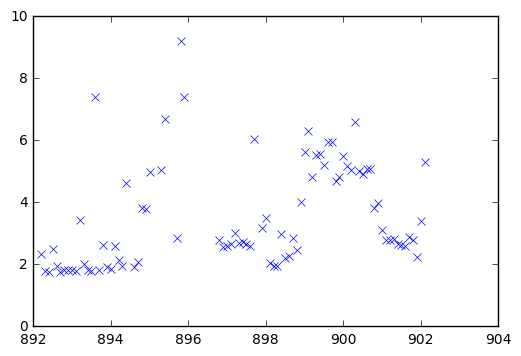

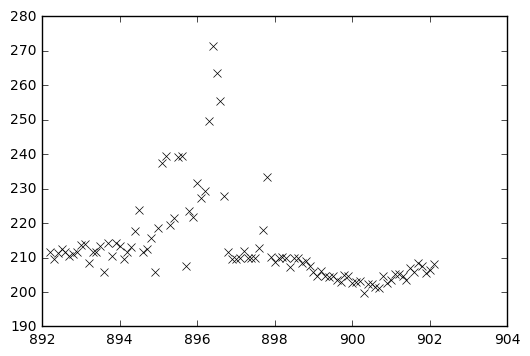

In [101]:
plt.ylim([0,10])
plt.plot(x[score_index],score_list,'kx',color='blue')
plt.show()
plt.plot(x[score_index],p2[score_index],'kx')
plt.show()

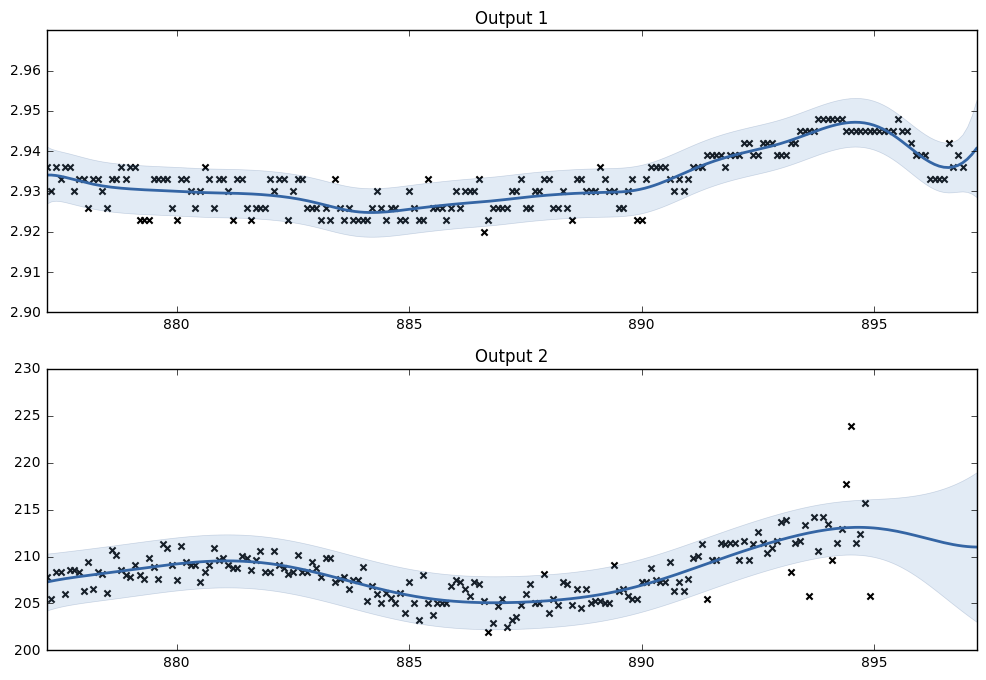

In [47]:
mul = GPy.models.GPCoregionalizedRegression([x[8772:8970],x[8772:8950]],[p1[8772:8970],p2[8772:8950]],kernel = kern)
mul['.*Gaussian_noise_0.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_0.variance)
mul['.*Gaussian_noise_1.variance'].constrain_fixed(gp.mixed_noise.Gaussian_noise_1.variance)
plot_2outputs(mul, xlim=(x[8772],x[8972]),x_1=x[8772:8970],x_2=x[8772:8950])
plt.show()

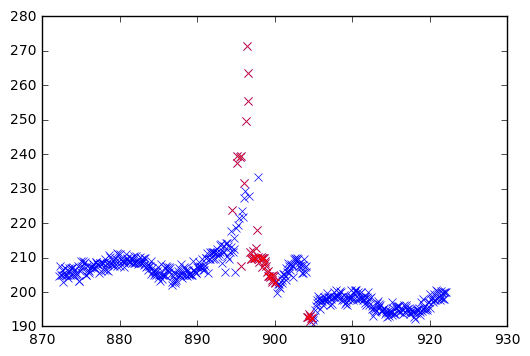

In [16]:
plt.plot(x[8722:9222],p2[8722:9222],'kx',color='blue')
plt.plot(x[anomal_points],p2[anomal_points],'kx',color='red')
plt.show()